In [6]:
# data management
import numpy as np                   # for linear algebra
import pandas as pd                  # for tabular data manipulation and processing
import category_encoders             # for categorical encoding

# machine learning
import sklearn                       # for data prep and classical ML

# data visualization and graphics
import matplotlib.pyplot as plt      # for visualization fundamentals
import seaborn as sns                # for pretty visualizations
sns.set_palette("magma")

# misc
import math                          # for calculation
import sys                           # for system manipulation
import os                            # for file manipulation

# stats
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

In [7]:
# Load Dataset

file_path = "/Users/Sebastiano/SLE/data/Clinical_MRI.xlsx"
db = pd.read_excel(file_path)
pd.set_option('display.max_columns', None)

print("N° of patients: {}".format(len(db)))
print("N° of columns: {}".format(db.shape[1]))
db.head()

N° of patients: 27
N° of columns: 969


Patient  Date of Birth  Gender    Education  Disease duration (months)  \
0  Paziente 1          30084       0  High School                      109.5   
1  Paziente 2          26505       0   University                       96.0   
2  Paziente 3          31954       0   University                       76.5   
3  Paziente 4          32438       0   University                       79.1   
4  Paziente 5          28445       0  high school                       42.0   

     Age  SLEDAI-2k (at the time of NP event)  PGA (at the time of fMRI)  \
0  38.00                                    0                        0.0   
1  41.17                                   13                        2.1   
2  32.00                                    2                        0.5   
3  31.00                                    2                        0.0   
4  43.00                                    2                        0.4   

   SLICC-DI (at the time of NP event)  \
0                                   1   
1                                   0   
2                                   0   
3                                   1   
4                                   0   

   anti-dsDNA Titre  (0=absent; 1=present) )  \
0                                          1   
1                                          1   
2                                          1   
3                                          1   
4                                          1   

   anti-dsDNA Titre  (insert NV here <7 )  Anti-Ro-SSA  Anti-La-SSB  Anti-RNP  \
0                                     3.0            0            0         0   
1                                    84.4            1            0         0   
2                                     4.0            1            0         0   
3                                     5.0            0            0         0   
4                                    37.2            1            0         0   

   anti-Sm  C3 (mgdl)  C4 (mgdl)  aPL syndrome  LAC  aCL IgG  aCL IgM  \
0        0         89         20             0    0        0        0   
1        0         64         15             0    0        0        0   
2        0         97         17             0    0        1        1   
3        0         84         14             0    0        1        0   
4        0        101         11             0    1        0        0   

   aB2GPI IgG  aB2GPI IgM  aPL+  No Treatment Antiplatelet Anticoagulant  \
0           0           0     0             0         None          None   
1           0           0     0             0         None          None   
2           0           0     1             0         None          None   
3           0           0     1             0         None          None   
4           0           0     1             0          yes          None   

   Prednisone  (mg equivalent)        Antimalarial Immunosuppressant  \
0                          2.5                None      Methotrexate   
1                          7.5  Hydroxychloroquine      Methotrexate   
2                          5.4  Hydroxychloroquine      Azathioprine   
3                          3.6  Hydroxychloroquine      Methotrexate   
4                          4.0  hydroxychloroquine      Methotrexate   

      Biologic  AnAb   Anti-Rib-P  Anti-DWEYS  NP-SLE  \
0         None      1           1           1       1   
1    Rituximab      1           1           0       0   
2    Belimumab      1           0           0       0   
3  tocilizumab      0           0           0       1   
4    Rituximab      0           0           1       0   

                             Event  Livedo reticularis  Cutaneous vasculitis  \
0  Mood abnormalities (depressive)                   0                     0   
1                              NaN                   0                     0   
2                              NaN                   0                     1   
3                          Seizure                   

## Stats for age, gender and disease duration


In [8]:
# calculate statistics for age
age_mean = db['Age'].mean()
age_std = db['Age'].std()
age_min = db['Age'].min()
age_max = db['Age'].max()
# calculate statistics for gender
gender_counts = db['Gender'].value_counts()
male_count = gender_counts[1]
female_count = gender_counts[0]
# calculate statistics for disease duration
disease_dur_mean = db['Disease duration (months)'].mean()
disease_dur_std = db['Disease duration (months)'].std()
disease_dur_min = db['Disease duration (months)'].min()
disease_dur_max = db['Disease duration (months)'].max()
# print out the results
print('Age Mean:', age_mean)
print('Age Std:', age_std)
print('Age Min:', age_min)
print('Age Max:', age_max)
print('Male Count:', male_count)
print('Female Count:', female_count)
print('Disease Duration Mean:', disease_dur_mean)
print('Disease Duration Std:', disease_dur_std)
print('Disease Duration Min:', disease_dur_min)
print('Disease Duration Max:', disease_dur_max)

Age Mean: 43.31195473259259
Age Std: 11.922392821938722
Age Min: 21.0
Age Max: 63.0
Male Count: 3
Female Count: 24
Disease Duration Mean: 94.75148148148149
Disease Duration Std: 94.64025837566751
Disease Duration Min: 1.2
Disease Duration Max: 406.6


## Descriptive Statistics of numeric columns (clinical)

In [9]:
db.iloc[:, :42].describe(include="number")

Date of Birth     Gender  Disease duration (months)        Age  \
count      27.000000  27.000000                  27.000000  27.000000   
mean    27827.777778   0.111111                  94.751481  43.311955   
std      4370.823618   0.320256                  94.640258  11.922393   
min     20794.000000   0.000000                   1.200000  21.000000   
25%     24186.500000   0.000000                  30.750000  32.626389   
50%     27750.000000   0.000000                  64.500000  43.000000   
75%     31833.000000   0.000000                 112.950000  53.500000   
max     35824.000000   1.000000                 406.600000  63.000000   

       SLEDAI-2k (at the time of NP event)  PGA (at the time of fMRI)  \
count                            27.000000                  27.000000   
mean                              8.296296                   1.044444   
std                               9.126524                   0.855900   
min                               0.000000                   0.000000   
25%                               2.000000                   0.300000   
50%                               4.000000                   1.000000   
75%                              13.000000                   1.650000   
max                              35.000000                   2.700000   

       SLICC-DI (at the time of NP event)  \
count                           27.000000   
mean                             0.962963   
std                              1.400041   
min                              0.000000   
25%                              0.000000   
50%                              0.000000   
75%                              1.000000   
max                              5.000000   

       anti-dsDNA Titre  (0=absent; 1=present) )  \
count                                  27.000000   
mean                                    0.851852   
std                                     0.362014   
min                                     0.000000   
25%                                     1.000000   
50%                                     1.000000   
75%                                     1.000000   
max                                     1.000000   

       anti-dsDNA Titre  (insert NV here <7 )  Anti-Ro-SSA  Anti-La-SSB  \
count                               27.000000    27.000000    27.000000   
mean                                44.466667     0.481481     0.074074   
std                                 89.319453     0.509175     0.266880   
min                                  0.000000     0.000000     0.000000   
25%                                  2.800000     0.000000     0.000000   
50%                                 16.000000     0.000000     0.000000   
75%                                 39.200000     1.000000     0.000000   
max                                416.000000     1.000000     1.000000   

        Anti-RNP    anti-Sm   C3 (mgdl)  C4 (mgdl)  aPL syndrome        LAC  \
count  27.000000  27.000000   27.000000  27.000000     27.000000  27.000000   
mean    0.296296   0.296296   85.333333  12.888889      0.148148   0.444444   
std     0.465322   0.465322   22.620617   5.625036      0.362014   0.506370   
min     0.000000   0.000000   31.000000   3.000000      0.000000   0.000000   
25%     0.000000   0.000000   70.500000   9.500000      0.000000   0.000000   
50%     0.000000   0.000000   89.000000  12.000000      0.000000   0.000000   
75%     1.000000   1.000000   96.500000  16.000000      0.000000   1.000000   
max     1.000000   1.000000  128.000000  25.000000      1.000000   1.000000   

         aCL IgG    aCL IgM  aB2GPI IgG  aB2GPI IgM       aPL+  No Treatment  \
count  27.000000  27.000000   27.000000   27.000000  27.000000     27.000000   
mean    0.296296   0.222222    0.222222    0.111111   0.555556      0.037037   
std     0.465322   0.423659    0.423659    0.320256   0.506370      0.192450   
min     0.000000   0.000000    0.000000    0.000000   0.000000      0.000000   
25%     0.000000   0.000000 

## Descriptive Statitistics based on NP-SLE and others

In [10]:
# NP-SLE
db.iloc[:,6:65].groupby(['NP-SLE']).describe()

SLEDAI-2k (at the time of NP event)                                  \
                                     count       mean       std  min   25%   
NP-SLE                                                                       
0                                     13.0   5.923077  9.420382  0.0  2.00   
1                                     14.0  10.500000  8.591140  0.0  3.25   

                        PGA (at the time of fMRI)                           \
        50%   75%   max                     count      mean       std  min   
NP-SLE                                                                       
0       2.0   6.0  35.0                      13.0  0.807692  0.787889  0.0   
1       9.0  14.0  28.0                      14.0  1.264286  0.885444  0.0   

                              SLICC-DI (at the time of NP event)            \
          25%   50%  75%  max                              count      mean   
NP-SLE                                                                       
0       0.200  0.50  1.0  2.3                               13.0  0.461538   
1       0.825  1.25  1.9  2.7                               14.0  1.428571   

                                            \
             std  min  25%  50%   75%  max   
NP-SLE                                       
0       0.776250  0.0  0.0  0.0  1.00  2.0   
1       1.696797  0.0  0.0  1.0  1.75  5.0   

       anti-dsDNA Titre  (0=absent; 1=present) )                           \
                                           count      mean       std  min   
NP-SLE                                                                      
0                                           13.0  0.846154  0.375534  0.0   
1                                           14.0  0.857143  0.363137  0.0   

                           anti-dsDNA Titre  (insert NV here <7 )             \
        25%  50%  75%  max                                  count       mean   
NP-SLE                                                                         
0       1.0  1.0  1.0  1.0                                   13.0  34.569231   
1       1.0  1.0  1.0  1.0                                   14.0  53.657143   

                                                   Anti-Ro-SSA            \
               std  min   25%    50%    75%    max       count      mean   
NP-SLE                                                                     
0        68.825509  0.0  1.40   4.00  35.00  248.7        13.0  0.461538   
1       106.744733  1.9  5.15  22.75  46.15  416.0        14.0  0.500000   

                                          Anti-La-SSB                      \
             std  min  25%  50%  75%  max       count      mean       std   
NP-SLE                                                                      
0       0.518875  0.0  0.0  0.0  1.0  1.0        13.0  0.076923  0.277350   
1       0.518875  0.0  0.0  0.5  1.0  1.0        14.0  0.071429  0.267261   

                                Anti-RNP                                     \
        min  25%  50%  75%  max    count      mean       std  min  25%  50%   
NP-SLE                                                                        
0       0.0  0.0  0.0  0.0  1.0     13.0  0.384615  0.506370  0.0  0.0  0.0   
1       0.0  0.0  0.0  0.0  1.0     14.0  0.214286  0.425815  0.0  0.0  0.0   

                 anti-Sm                                                \
        75%  max   count      mean       std  min  25%  50%   75%  max   
NP-SLE                                                                   
0       1.0  1.0    13.0  0.307692  0.480384  0.0  0.0  0.0  1.00  1.0   
1       0.0  1.0    14.0  0.285714  0.468807  0.0  0.0  0.0  0.75  1.0   

       C3 (mgdl)                                                        \
           count       mean        std   min   25%   50%    75%    max   
NP-SLE                                                                   
0           13.0  85.692308  27.469330  31.0  64.0  89.0  97

In [11]:
# AnAb
db.iloc[:,6:65].groupby(['AnAb ']).describe()

SLEDAI-2k (at the time of NP event)                                  \
                                    count       mean        std  min  25%   
AnAb                                                                        
0                                     9.0   3.777778   4.549115  0.0  1.0   
1                                    18.0  10.555556  10.071639  0.0  3.0   

                        PGA (at the time of fMRI)                           \
       50%    75%   max                     count      mean       std  min   
AnAb                                                                         
0      2.0   6.00  14.0                       9.0  0.500000  0.547723  0.0   
1      7.0  13.75  35.0                      18.0  1.316667  0.862452  0.0   

                             SLICC-DI (at the time of NP event)            \
         25%   50%  75%  max                              count      mean   
AnAb                                                                        
0      0.000  0.40  0.8  1.6                                9.0  0.666667   
1      0.825  1.25  2.0  2.7                               18.0  1.111111   

                                           \
            std  min  25%  50%   75%  max   
AnAb                                        
0      0.707107  0.0  0.0  1.0  1.00  2.0   
1      1.640979  0.0  0.0  0.0  1.75  5.0   

      anti-dsDNA Titre  (0=absent; 1=present) )                                \
                                          count      mean       std  min  25%   
AnAb                                                                            
0                                           9.0  0.666667  0.500000  0.0  0.0   
1                                          18.0  0.944444  0.235702  0.0  1.0   

                     anti-dsDNA Titre  (insert NV here <7 )         \
       50%  75%  max                                  count   mean   
AnAb                                                                 
0      1.0  1.0  1.0                                    9.0   8.70   
1      1.0  1.0  1.0                                   18.0  62.35   

                                               Anti-Ro-SSA                     \
              std  min  25%   50%   75%    max       count      mean      std   
AnAb                                                                            
0       13.613229  0.0  1.1   2.6   5.0   37.2         9.0  0.333333  0.50000   
1      105.349442  1.9  5.7  28.5  59.2  416.0        18.0  0.555556  0.51131   

                               Anti-La-SSB                                     \
       min  25%  50%  75%  max       count      mean       std  min  25%  50%   
AnAb                                                                            
0      0.0  0.0  0.0  1.0  1.0         9.0  0.111111  0.333333  0.0  0.0  0.0   
1      0.0  0.0  1.0  1.0  1.0        18.0  0.055556  0.235702  0.0  0.0  0.0   

                Anti-RNP                                              anti-Sm  \
       75%  max    count      mean       std  min  25%  50%  75%  max   count   
AnAb                                                                            
0      0.0  1.0      9.0  0.222222  0.440959  0.0  0.0  0.0  0.0  1.0     9.0   
1      0.0  1.0     18.0  0.333333  0.485071  0.0  0.0  0.0  1.0  1.0    18.0   

                                                    C3 (mgdl)             \
           mean       std  min  25%  50%   75%  max     count       mean   
AnAb                                                                       
0      0.333333  0.500000  0.0  0.0  0.0  1.00  1.0       9.0  93.333333   
1      0.277778  0.460889  0.0  0.0  0.0  0.75  1.0      18.0  81.333333   

                                                  C4 (mgdl)             \
             std   min    25%   50%    75%    max     count       mean   
AnAb                                                                     
0      22.627417  57.0  84.00  86.0  10

In [12]:
# aPL Syndrome
db.iloc[:,6:65].groupby(['aPL syndrome']).describe()

SLEDAI-2k (at the time of NP event)                             \
                                           count       mean        std  min   
aPL syndrome                                                                  
0                                           23.0   7.391304   8.337970  0.0   
1                                            4.0  13.500000  13.025616  2.0   

                                      PGA (at the time of fMRI)            \
               25%   50%    75%   max                     count      mean   
aPL syndrome                                                                
0             2.00   4.0  11.50  35.0                      23.0  0.952174   
1             2.75  12.0  22.75  28.0                       4.0  1.575000   

                                                    \
                   std  min  25%   50%    75%  max   
aPL syndrome                                         
0             0.762096  0.0  0.3  1.00  1.550  2.3   
1             1.284199  0.1  0.7  1.75  2.625  2.7   

             SLICC-DI (at the time of NP event)                                \
                                          count      mean       std  min  25%   
aPL syndrome                                                                    
0                                          23.0  0.652174  1.027295  0.0  0.0   
1                                           4.0  2.750000  2.061553  1.0  1.0   

                             anti-dsDNA Titre  (0=absent; 1=present) )  \
              50%   75%  max                                     count   
aPL syndrome                                                             
0             0.0  1.00  4.0                                      23.0   
1             2.5  4.25  5.0                                       4.0   

                                                           \
                  mean      std  min   25%  50%  75%  max   
aPL syndrome                                                
0             0.869565  0.34435  0.0  1.00  1.0  1.0  1.0   
1             0.750000  0.50000  0.0  0.75  1.0  1.0  1.0   

             anti-dsDNA Titre  (insert NV here <7 )                        \
                                              count       mean        std   
aPL syndrome                                                                
0                                              23.0  48.082609  95.887906   
1                                               4.0  23.675000  32.240696   

                                            Anti-Ro-SSA                      \
              min    25%   50%   75%    max       count      mean       std   
aPL syndrome                                                                  
0             0.0  2.800  19.5  39.2  416.0        23.0  0.478261  0.510754   
1             1.9  4.675  10.8  29.8   71.2         4.0  0.500000  0.577350   

                                      Anti-La-SSB                           \
              min  25%  50%  75%  max       count      mean       std  min   
aPL syndrome                                                                 
0             0.0  0.0  0.0  1.0  1.0        23.0  0.086957  0.288104  0.0   
1             0.0  0.0  0.5  1.0  1.0         4.0  0.000000  0.000000  0.0   

                                 Anti-RNP                                     \
              25%  50%  75%  max    count      mean       std  min  25%  50%   
aPL syndrome                                                                   
0             0.0  0.0  0.0  1.0     23.0  0.304348  0.470472  0.0  0.0  0.0   
1             0.0  0.0  0.0  0.0      4.0  0.250000  0.500000  0.0  0.0  0.0   

                        anti-Sm                                                \
               75%  max   count      mean       std  min  25%  50%   75%  max   
aPL syndrome                                                                    
0             1.00  1.0    23.0  0.304348  0.470472  0.0  0.

In [13]:
#smoking
db.iloc[:,6:65].groupby(['ever smoking']).describe()

SLEDAI-2k (at the time of NP event)                           \
                                           count      mean       std  min   
ever smoking                                                                
0                                           18.0  8.111111  9.151592  0.0   
1                                            9.0  8.666667  9.617692  0.0   

                                   PGA (at the time of fMRI)            \
              25%  50%   75%   max                     count      mean   
ever smoking                                                             
0             2.0  4.0  13.0  35.0                      18.0  0.955556   
1             3.0  6.0  10.0  28.0                       9.0  1.222222   

                                                     \
                   std  min    25%  50%    75%  max   
ever smoking                                          
0             0.842421  0.0  0.125  0.9  1.675  2.3   
1             0.905232  0.0  0.800  1.0  1.500  2.7   

             SLICC-DI (at the time of NP event)                                \
                                          count      mean       std  min  25%   
ever smoking                                                                    
0                                          18.0  0.555556  1.041618  0.0  0.0   
1                                           9.0  1.777778  1.715938  0.0  1.0   

                            anti-dsDNA Titre  (0=absent; 1=present) )  \
              50%  75%  max                                     count   
ever smoking                                                            
0             0.0  1.0  4.0                                      18.0   
1             1.0  2.0  5.0                                       9.0   

                                                           \
                  mean       std  min  25%  50%  75%  max   
ever smoking                                                
0             0.833333  0.383482  0.0  1.0  1.0  1.0  1.0   
1             0.888889  0.333333  0.0  1.0  1.0  1.0  1.0   

             anti-dsDNA Titre  (insert NV here <7 )                         \
                                              count       mean         std   
ever smoking                                                                 
0                                              18.0  58.016667  106.467931   
1                                               9.0  17.366667   24.521419   

                                            Anti-Ro-SSA                      \
              min  25%    50%    75%    max       count      mean       std   
ever smoking                                                                  
0             0.0  4.0  23.25  45.15  416.0        18.0  0.500000  0.514496   
1             0.0  1.9   5.60  26.00   71.2         9.0  0.444444  0.527046   

                                      Anti-La-SSB                           \
              min  25%  50%  75%  max       count      mean       std  min   
ever smoking                                                                 
0             0.0  0.0  0.5  1.0  1.0        18.0  0.111111  0.323381  0.0   
1             0.0  0.0  0.0  1.0  1.0         9.0  0.000000  0.000000  0.0   

                                 Anti-RNP                                     \
              25%  50%  75%  max    count      mean       std  min  25%  50%   
ever smoking                                                                   
0             0.0  0.0  0.0  1.0     18.0  0.222222  0.427793  0.0  0.0  0.0   
1             0.0  0.0  0.0  0.0      9.0  0.444444  0.527046  0.0  0.0  0.0   

                       anti-Sm                                               \
              75%  max   count      mean       std  min  25%  50%  75%  max   
ever smoking                                                                  
0             0.0  1.0    18.0  0.222222  0.427793  0.0  0.0  0.0  0.0  1.0   
1      

## Data Cleaning

In [14]:
# Drop unwanted columns

df = db.drop(['Patient','Date of Birth', 'Gender', 'Education', 'Age'], axis = 'columns')
# drop columns that include "%" in their name
#cols_to_drop = [col for col in df.columns if "%" in col]
#df = df.drop(columns=cols_to_drop)
print("Effective features to consider: {} ".format(len(df.columns)-1))

Effective features to consider: 963 


In [15]:
# 0 = No Event
df.loc[df['NP-SLE']== 0, 'result'] = 0

# 1 = NP Event
df.loc[df['NP-SLE'] ==1, 'result'] = 1

In [16]:
df.drop(['NP-SLE'], axis = 'columns')
df.head()

Disease duration (months)  SLEDAI-2k (at the time of NP event)  \
0                      109.5                                    0   
1                       96.0                                   13   
2                       76.5                                    2   
3                       79.1                                    2   
4                       42.0                                    2   

   PGA (at the time of fMRI)  SLICC-DI (at the time of NP event)  \
0                        0.0                                   1   
1                        2.1                                   0   
2                        0.5                                   0   
3                        0.0                                   1   
4                        0.4                                   0   

   anti-dsDNA Titre  (0=absent; 1=present) )  \
0                                          1   
1                                          1   
2                                          1   
3                                          1   
4                                          1   

   anti-dsDNA Titre  (insert NV here <7 )  Anti-Ro-SSA  Anti-La-SSB  Anti-RNP  \
0                                     3.0            0            0         0   
1                                    84.4            1            0         0   
2                                     4.0            1            0         0   
3                                     5.0            0            0         0   
4                                    37.2            1            0         0   

   anti-Sm  C3 (mgdl)  C4 (mgdl)  aPL syndrome  LAC  aCL IgG  aCL IgM  \
0        0         89         20             0    0        0        0   
1        0         64         15             0    0        0        0   
2        0         97         17             0    0        1        1   
3        0         84         14             0    0        1        0   
4        0        101         11             0    1        0        0   

   aB2GPI IgG  aB2GPI IgM  aPL+  No Treatment Antiplatelet Anticoagulant  \
0           0           0     0             0         None          None   
1           0           0     0             0         None          None   
2           0           0     1             0         None          None   
3           0           0     1             0         None          None   
4           0           0     1             0          yes          None   

   Prednisone  (mg equivalent)        Antimalarial Immunosuppressant  \
0                          2.5                None      Methotrexate   
1                          7.5  Hydroxychloroquine      Methotrexate   
2                          5.4  Hydroxychloroquine      Azathioprine   
3                          3.6  Hydroxychloroquine      Methotrexate   
4                          4.0  hydroxychloroquine      Methotrexate   

      Biologic  AnAb   Anti-Rib-P  Anti-DWEYS  NP-SLE  \
0         None      1           1           1       1   
1    Rituximab      1           1           0       0   
2    Belimumab      1           0           0       0   
3  tocilizumab      0           0           0       1   
4    Rituximab      0           0           1       0   

                             Event  Livedo reticularis  Cutaneous vasculitis  \
0  Mood abnormalities (depressive)                   0                     0   
1                              NaN                   0                     0   
2                              NaN                   0                     1   
3                          Seizure                   0                     0   
4                              NaN                   0                     0   

   Hypertension  Hyperlipidaemia  current Smoking  ever smoking  Scale factor  \
0             0                0                0             1       0.67586   
1             0                0                0             0       0.70729   
2      

In [17]:
# Describe
df.groupby(['result']).describe()

Disease duration (months)                                              \
                           count        mean         std   min    25%    50%   
result                                                                         
0.0                         13.0  107.756154  112.815607  1.20  37.70  76.50   
1.0                         14.0   82.675714   76.413747  5.83  25.55  64.25   

                       SLEDAI-2k (at the time of NP event)             \
           75%     max                               count       mean   
result                                                                  
0.0     159.13  406.60                                13.0   5.923077   
1.0     103.35  244.23                                14.0  10.500000   

                                             PGA (at the time of fMRI)  \
             std  min   25%  50%   75%   max                     count   
result                                                                   
0.0     9.420382  0.0  2.00  2.0   6.0  35.0                      13.0   
1.0     8.591140  0.0  3.25  9.0  14.0  28.0                      14.0   

                                                        \
            mean       std  min    25%   50%  75%  max   
result                                                   
0.0     0.807692  0.787889  0.0  0.200  0.50  1.0  2.3   
1.0     1.264286  0.885444  0.0  0.825  1.25  1.9  2.7   

       SLICC-DI (at the time of NP event)                                     \
                                    count      mean       std  min  25%  50%   
result                                                                         
0.0                                  13.0  0.461538  0.776250  0.0  0.0  0.0   
1.0                                  14.0  1.428571  1.696797  0.0  0.0  1.0   

                  anti-dsDNA Titre  (0=absent; 1=present) )            \
         75%  max                                     count      mean   
result                                                                  
0.0     1.00  2.0                                      13.0  0.846154   
1.0     1.75  5.0                                      14.0  0.857143   

                                           \
             std  min  25%  50%  75%  max   
result                                      
0.0     0.375534  0.0  1.0  1.0  1.0  1.0   
1.0     0.363137  0.0  1.0  1.0  1.0  1.0   

       anti-dsDNA Titre  (insert NV here <7 )                              \
                                        count       mean         std  min   
result                                                                      
0.0                                      13.0  34.569231   68.825509  0.0   
1.0                                      14.0  53.657143  106.744733  1.9   

                                  Anti-Ro-SSA                                \
         25%    50%    75%    max       count      mean       std  min  25%   
result                                                                        
0.0     1.40   4.00  35.00  248.7        13.0  0.461538  0.518875  0.0  0.0   
1.0     5.15  22.75  46.15  416.0        14.0  0.500000  0.518875  0.0  0.0   

                      Anti-La-SSB                                          \
        50%  75%  max       count      mean       std  min  25%  50%  75%   
result                                                                      
0.0     0.0  1.0  1.0        13.0  0.076923  0.277350  0.0  0.0  0.0  0.0   
1.0     0.5  1.0  1.0        14.0  0.071429  0.267261  0.0  0.0  0.0  0.0   

            Anti-RNP                                              anti-Sm  \
        max    count      mean       std  min  25%  50%  75%  max   count   
result                                                                      
0.0     1.0     13.0  0.384615  0.506370  0.0  0.0  0.0  1.0  1.0    13.0   
1.0     1.0     14.0  0.214286  0.425815  0.0  0.0  0.0  0.0  1.0    14.0   

                               

In [18]:
# Calculate the percentage of missing values in each column
missing_perc = (df.isnull().sum() / len(df)) * 100

# Calculate the percentage of unique values in each column
unique_perc = (df.nunique() / len(df)) * 100

# Calculate the skewness of each column
skewness = df.skew()

# Print the results
print('Column Noisiness:')
print('-------------------')
print('Missing values:')
print(missing_perc)
print('Unique values:')
print(unique_perc)
print('-------------------')
print('Type of noise:')
print('-------------------')
print('Skewness:')
print(skewness)

Column Noisiness:
-------------------
Missing values:
Disease duration (months)                    0.0
SLEDAI-2k (at the time of NP event)          0.0
PGA (at the time of fMRI)                    0.0
SLICC-DI (at the time of NP event)           0.0
anti-dsDNA Titre  (0=absent; 1=present) )    0.0
                                            ... 
PO right thickness norm.                     0.0
PO left thickness mm                         0.0
PO left thickness norm.                      0.0
PO thickness asymmetry                       0.0
result                                       0.0
Length: 965, dtype: float64
Unique values:
Disease duration (months)                    100.000000
SLEDAI-2k (at the time of NP event)           55.555556
PGA (at the time of fMRI)                     59.259259
SLICC-DI (at the time of NP event)            18.518519
anti-dsDNA Titre  (0=absent; 1=present) )      7.407407
                                                ...    
PO right thickness norm.    

/var/folders/gv/8pp24fhj55x0_14187vq2lkh0000gp/T/ipykernel_9766/2226106056.py:8: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()


In [19]:
## transform columns with high skewness.


# Identify columns with high skewness
#high_skew_cols = skewness[abs(skewness) > 1].index.tolist()
#print('-------------------')
#print('High skewness columns:')
#print(high_skew_cols)

# Apply log transformation to high skewness columns
#for col in high_skew_cols:
    #df[col] = np.log1p(df[col])

In [20]:
# One Hot Encoding for Scores, Antiplatelets and Coagulants, Therapy, NP Event

from sklearn.preprocessing import OneHotEncoder

categ = ['Antiplatelet', 'Anticoagulant', 'Antimalarial', 'Immunosuppressant', 'Biologic', 'Event']
ohe = OneHotEncoder(categories='auto',sparse=False)
df_enc = ohe.fit_transform(df[categ])
df_enc = pd.DataFrame(df_enc,columns=ohe.get_feature_names_out(categ))
df = pd.concat([df, df_enc], axis=1)
df = df.drop(categ, axis=1)
df.tail()

/opt/homebrew/Caskroom/miniforge/base/envs/lupus/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Disease duration (months)  SLEDAI-2k (at the time of NP event)  \
22                      30.20                                   14   
23                      21.80                                    6   
24                     243.30                                   21   
25                     159.13                                    2   
26                      45.10                                    2   

    PGA (at the time of fMRI)  SLICC-DI (at the time of NP event)  \
22                        1.6                                   1   
23                        1.0                                   0   
24                        2.6                                   4   
25                        1.7                                   0   
26                        0.0                                   0   

    anti-dsDNA Titre  (0=absent; 1=present) )  \
22                                          0   
23                                          1   
24                                          1   
25                                          1   
26                                          1   

    anti-dsDNA Titre  (insert NV here <7 )  Anti-Ro-SSA  Anti-La-SSB  \
22                                     4.0            1            1   
23                                    41.2            0            0   
24                                     1.9            0            0   
25                                     2.0            0            0   
26                                     2.6            0            0   

    Anti-RNP  anti-Sm  C3 (mgdl)  C4 (mgdl)  aPL syndrome  LAC  aCL IgG  \
22         0        1         78         13             0    1        0   
23         0        0         96         17             0    0        0   
24         0        0         62         11             1    1        1   
25         1        0         97          8             0    1        1   
26         0        0         85         19             0    1        0   

    aCL IgM  aB2GPI IgG  aB2GPI IgM  aPL+  No Treatment  \
22        1           0           1     1             0   
23        0           0           0     0             0   
24        0           1           0     1             0   
25        0           1           0     1             0   
26        0           0           0     1             0   

    Prednisone  (mg equivalent)  AnAb   Anti-Rib-P  Anti-DWEYS  NP-SLE  \
22                         10.1      0           0           1       1   
23                         15.0      1           1           0       1   
24                         14.3      1           0           0       1   
25                          5.0      1           0           1       0   
26                          0.0      0           0           0       0   

    Livedo reticularis  Cutaneous vasculitis  Hypertension  Hyperlipidaemia  \
22                   0                     1             1                1   
23                   0                     0             0                0   
24                   0                     0             0                0   
25                   0                     0             0                0   
26                   0                     0             0                0   

    current Smoking  ever smoking  Scale factor       SNR  \
22                0             0       0.62973   43.8559   
23                1             1       0.73500   47.0085   
24                1             1       0.75214   45.3995   
25                0             0       0.57994  102.2972   
26                0             0       0.82252   38.7983   

    White Matter (WM) volume cm3  White Matter (WM) volume %  \
22                      393.3745                     34.4270   
23                      495.4935                     37.0849   
24                      457.9349                     34.1854   
25                      415.1286                     39.2274   
26                      550

## Correlation Analysis

In [11]:
# Calculate Pearson correlation coefficient
pearson_corr = df.corr(method='pearson')
print(f"Pearson correlation coefficient{pearson_corr}")

# Calculate Spearman correlation coefficient
spearman_corr = df.corr(method='spearman')
print(f"Spearman correlation coefficient{spearman_corr}")

# Calculate Kendall correlation coefficient
kendall_corr = df.corr(method='kendall')
print(f"Kendall correlation coefficient{kendall_corr}")

Pearson correlation coefficient                                           Disease duration (months)  \
Disease duration (months)                                   1.000000   
SLEDAI-2k (at the time of NP event)                        -0.180959   
PGA (at the time of fMRI)                                  -0.026866   
SLICC-DI (at the time of NP event)                          0.234554   
anti-dsDNA Titre  (0=absent; 1=present) )                  -0.159773   
...                                                              ...   
Event_Movement Disorder                                    -0.063882   
Event_Psychosis                                             0.099737   
Event_Seizure                                               0.080041   
Event_Seizure, ACS, myelitis, CVA                          -0.077608   
Event_nan                                                   0.134936   

                                           SLEDAI-2k (at the time of NP event)  \
Disease duration (mont

Kendall correlation coefficient                                           Disease duration (months)  \
Disease duration (months)                                   1.000000   
SLEDAI-2k (at the time of NP event)                        -0.111994   
PGA (at the time of fMRI)                                   0.008801   
SLICC-DI (at the time of NP event)                          0.080083   
anti-dsDNA Titre  (0=absent; 1=present) )                   0.044519   
...                                                              ...   
Event_Movement Disorder                                     0.000000   
Event_Psychosis                                             0.000000   
Event_Seizure                                               0.088066   
Event_Seizure, ACS, myelitis, CVA                          -0.041872   
Event_nan                                                   0.055391   

                                           SLEDAI-2k (at the time of NP event)  \
Disease duration (mont

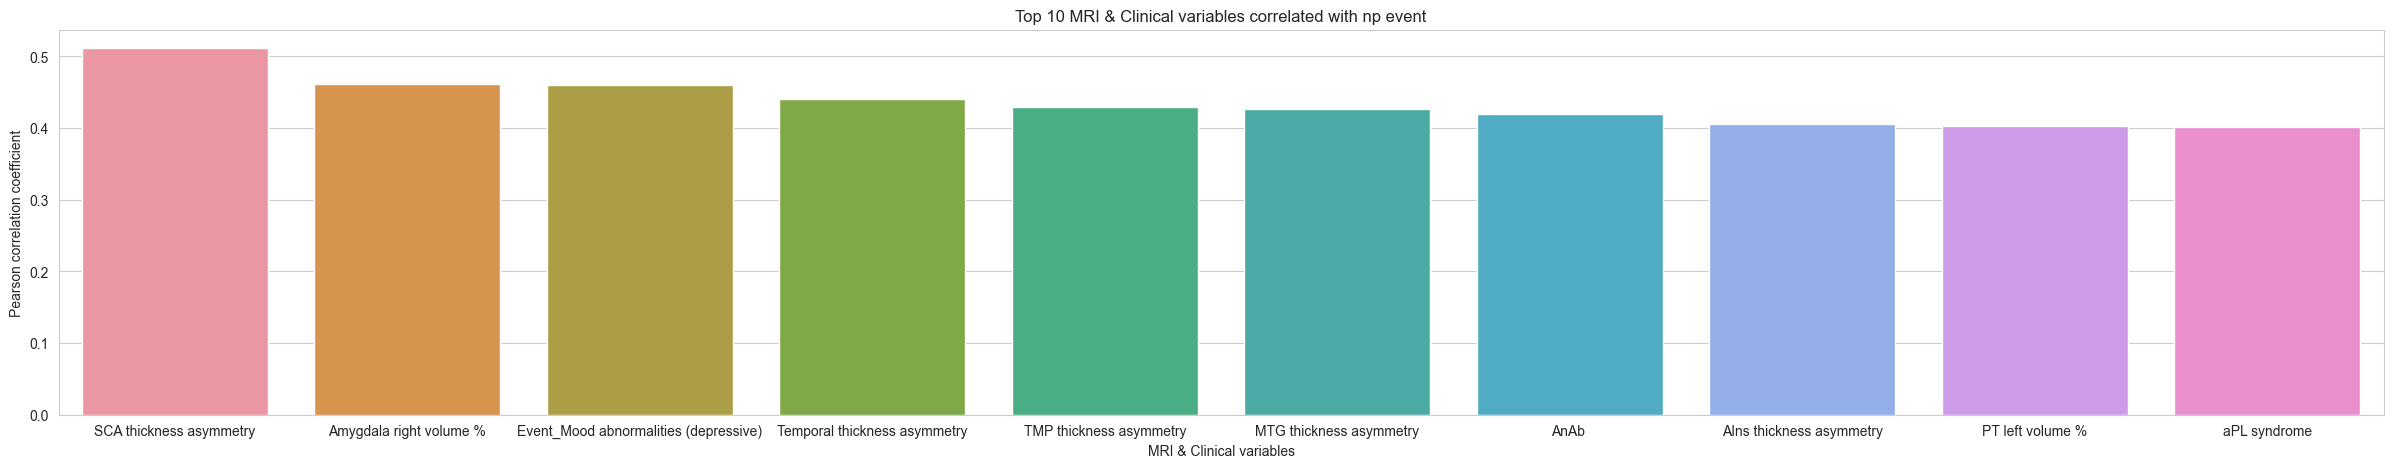

In [12]:
## -> adjust the barplot colors to make it easier to interpret the correlations.

# Select the row of the correlation matrix corresponding to 'result'
pearson_corr = pearson_corr.loc['result',:]

# Sort the correlations in descending order
pearson_corr = pearson_corr.sort_values(ascending=False)

# Select the top 10 correlated variables
top_10_corr = pearson_corr.iloc[2:12]

# Plot the top 10 correlations using a barplot
sns.set_style("whitegrid")
plt.figure(figsize=(30,5))
ax = sns.barplot(x=top_10_corr.index, y=top_10_corr.values)
plt.title('Top 10 MRI & Clinical variables correlated with np event')
plt.xlabel('MRI & Clinical variables')
plt.ylabel('Pearson correlation coefficient')
plt.show()

## Check for Normality and Homogeneity

In [19]:
from scipy.stats import shapiro, levene
# Select the numeric columns
numeric_cols = df.iloc[:, :61].select_dtypes(include=['float64', 'int64']).columns.tolist()
# Shapiro-Wilk test for normality
for col in numeric_cols:
    stat, p = shapiro(df[col])
    alpha = 0.05
    if p > alpha:
        print(f"{col}: sample looks Gaussian (fail to reject H0)")
    else:
        print(f"{col}: sample does not look Gaussian (reject H0)")

# Levene's test for homogeneity of variances
group1 = df[df['result'] == 0]['Disease duration (months)']
group2 = df[df['result'] == 1]['Disease duration (months)']
stat, p = levene(group1, group2)
alpha = 0.05
if p > alpha:
    print("The variances of the two groups are homogeneous (fail to reject H0)")
else:
    print("The variances of the two groups are not homogeneous (reject H0)")


Disease duration (months): sample does not look Gaussian (reject H0)
SLEDAI-2k (at the time of NP event): sample does not look Gaussian (reject H0)
PGA (at the time of fMRI): sample does not look Gaussian (reject H0)
SLICC-DI (at the time of NP event): sample does not look Gaussian (reject H0)
anti-dsDNA Titre  (0=absent; 1=present) ): sample does not look Gaussian (reject H0)
anti-dsDNA Titre  (insert NV here <7 ): sample does not look Gaussian (reject H0)
Anti-Ro-SSA: sample does not look Gaussian (reject H0)
Anti-La-SSB: sample does not look Gaussian (reject H0)
Anti-RNP: sample does not look Gaussian (reject H0)
anti-Sm: sample does not look Gaussian (reject H0)
C3 (mgdl): sample looks Gaussian (fail to reject H0)
C4 (mgdl): sample looks Gaussian (fail to reject H0)
aPL syndrome: sample does not look Gaussian (reject H0)
LAC: sample does not look Gaussian (reject H0)
aCL IgG: sample does not look Gaussian (reject H0)
aCL IgM: sample does not look Gaussian (reject H0)
aB2GPI IgG: sa

/opt/homebrew/Caskroom/miniforge/base/envs/lupus/lib/python3.10/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


# Non-Parametric Tests

## Welch’s t-test (t-test equivalent for unequal variance)

In [20]:
# Perform a Welch's t-test
NP = df.query('result == 1')['Abnormal Appearing White Matter volume cm3']
N_NP = df.query('result == 0')['Abnormal Appearing White Matter volume cm3']
t_stat, p_val = stats.ttest_ind(NP, N_NP, equal_var=False)

# Print the results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Interpret the results
if p_val < 0.05:
    print("There is a significant difference between the means of the two groups.")
else:
    print("There is no significant difference between the means of the two groups.")

t-statistic: 0.7999
p-value: 0.4313
There is no significant difference between the means of the two groups.


In [21]:
# Define the columns to test
columns_to_test = df.columns[:55]

# Create an empty dataframe to store the t-test results
#t_test_results = pd.DataFrame(columns=['Variable', 'T-statistic', 'p-value'])

relevant_columns = []

## Iterate over the columns
for column in columns_to_test:
    # Check if the column contains only numeric data
    if np.issubdtype(df[column].dtype, np.number):
        # Select the data for the two groups
        group1 = df[df['result'] == 0][column]
        group2 = df[df['result'] == 1][column]

        # Perform a Welch's t-test
        t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)

        # Print the results
        # Check if the p-value is below the significance level
        if p_val < 0.05:
            # Add the column to the list of relevant columns
            relevant_columns.append(column)
            print(f"Column: {column}, T-statistic: {t_stat:.3f}, p-value: {p_val:.5f}")
            
# Print the final list of relevant columns
print(f"Statistically significant: {relevant_columns}")

Column: aPL syndrome, T-statistic: -2.280, p-value: 0.04009
Column: AnAb , T-statistic: -2.279, p-value: 0.03305
Column: Anti-Rib-P, T-statistic: -2.235, p-value: 0.03682
Column: NP-SLE, T-statistic: -inf, p-value: 0.00000
Statistically significant: ['aPL syndrome', 'AnAb ', 'Anti-Rib-P', 'NP-SLE']


/var/folders/gv/8pp24fhj55x0_14187vq2lkh0000gp/T/ipykernel_8192/226067957.py:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)


## Wilcoxon rank-sum test to compare continuous variables among groups

Wilcoxon rank-sum test results:
Statistic: 3.8146448263914623
P-value: 0.0001363789376650375


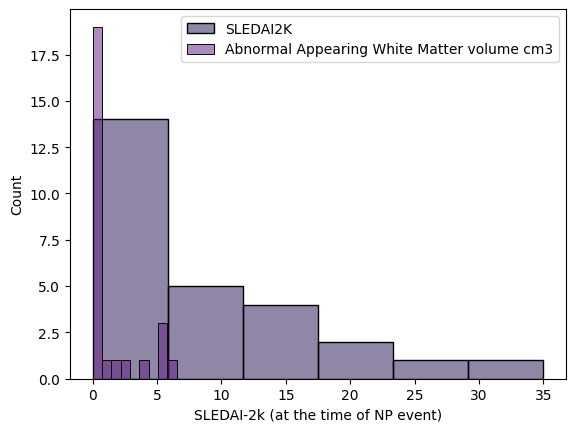

In [21]:
from scipy.stats import ranksums

# Choose the two variables for the test
var1 = df['SLEDAI-2k (at the time of NP event)']
var2 = df['Abnormal Appearing White Matter volume cm3']

# Perform the Wilcoxon rank-sum test
statistic, pvalue = ranksums(var1, var2)

# Print the test results
print("Wilcoxon rank-sum test results:")
print(f"Statistic: {statistic}")
print(f"P-value: {pvalue}")

# Plot the distribution of the two variables
sns.histplot(df, x ="SLEDAI-2k (at the time of NP event)", label="SLEDAI2K", alpha = 0.5)
sns.histplot(df, x ="Abnormal Appearing White Matter volume cm3", label = "Abnormal Appearing White Matter volume cm3", alpha = 0.5)
plt.legend()
plt.show()

Event_nan: p-value = 0.0000
Amygdala right volume %: p-value = 0.0369
OpIFG total volume cm3: p-value = 0.0226
OpIFG total volume %: p-value = 0.0290
OpIFG left volume cm3: p-value = 0.0174
OpIFG left volume %: p-value = 0.0290
MFG total volume %: p-value = 0.0226
SMC left volume %: p-value = 0.0415
SMC volume asymmetry: p-value = 0.0088
PT left volume %: p-value = 0.0415
TTG right volume cm3: p-value = 0.0174
TTG right volume %: p-value = 0.0174
Parietal right volume cm3: p-value = 0.0369
Parietal right volume %: p-value = 0.0415
Parietal volume asymmetry: p-value = 0.0466
Occipital total volume %: p-value = 0.0290
Occipital left volume %: p-value = 0.0198
Calc total volume cm3: p-value = 0.0226
Calc left volume cm3: p-value = 0.0256
IOG left volume %: p-value = 0.0101
OCP total volume cm3: p-value = 0.0369
OCP total volume %: p-value = 0.0226
OCP right volume %: p-value = 0.0415
OCP left volume %: p-value = 0.0415
ACgG volume asymmetry: p-value = 0.0327
CO total volume cm3: p-value =

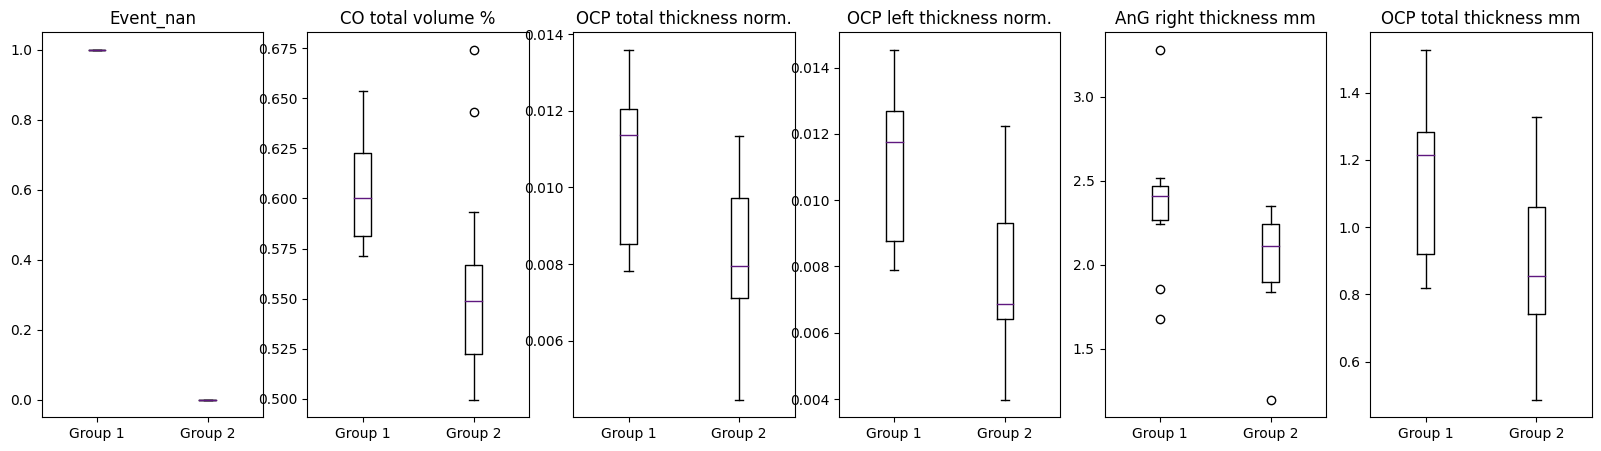

In [23]:
# Define the columns of interest
neuro_scores_cols = [
'Event_CVA',
'Event_Mood abnormalities (depressive)',
'Event_Mood abnormalities (mixed)',
'Event_Movement Disorder',
'Event_Psychosis',
'Event_Seizure',
'Event_Seizure, ACS, myelitis, CVA',
'Event_nan'
]
prednisone_col = 'Prednisone  (mg equivalent)' # Fixed the variable name
antibodies_cols = ['AnAb ','aPL+']
risk_factors_cols = list(df.columns [35:42]) # Convert to list
sledai_col = 'SLEDAI-2k (at the time of NP event)'
brain_region_cols = list(df.columns [44:937]) # Convert to list
# Define the arous to compare
group1 = df[df['result'] == 0]
group2 = df[df['result'] == 1]
# Perform the Wilcoxon rank-sum test for all continuous variables among groups
significant_vars = []
p_values = []
# Fixed the loop condition and added brain region cols
for col in neuro_scores_cols + [prednisone_col] + antibodies_cols + risk_factors_cols + [sledai_col] + brain_region_cols:
                   pval = ranksums(group1[col], group2[col])[1]
                   if pval < 0.05:
                    significant_vars.append(col)
                    p_values.append(pval)
                    print(f"{col}: p-value = {pval:.4f}")
# Sort the significant variables by p-value
sorted_vars = [x for _, x in sorted(zip (p_values, significant_vars))]
# Plot the five most significant variables
fig, axs = plt.subplots (1, 6, figsize= (20, 5))
for i in range (6):
    col = sorted_vars[i]
    axs[i].boxplot([group1[col], group2[col]])
    axs[i].set_xticklabels(['Group 1','Group 2'])
    axs[i].set_title(col)
# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/Wilcoxon.png', dpi=300, bbox_inches='tight')
plt.show()  
plt.close(fig)

## Fisher’s exact to compare categorical variables among groups

In [47]:
from scipy.stats import fisher_exact

# Select the two variables to compare
var_1 = df['result']
var_2 = df['AnAb ']

# Bin variables into two categories
var1_bins = pd.cut(var1, bins=[-1, 1.5, 2], labels=['No_NP', 'Yes_NP'])
var2_bins = pd.cut(var2, bins=[-1, 1.5, 2], labels=['AnAb_0', 'AnAb_1'])

n_var_1 = var_1.to_numpy()
n_var_2 = var_2.to_numpy()

# Create the contingency table

contingency_table = pd.crosstab(n_var_1, n_var_2, margins=False)

# Perform the Fisher's exact test
odds_ratio, p_value = fisher_exact(contingency_table)

# Print results
print(f"Odds ratio: {odds_ratio:.2f}")
print(f"P-value: {p_value:.4f}")

Odds ratio: 7.00
P-value: 0.0461


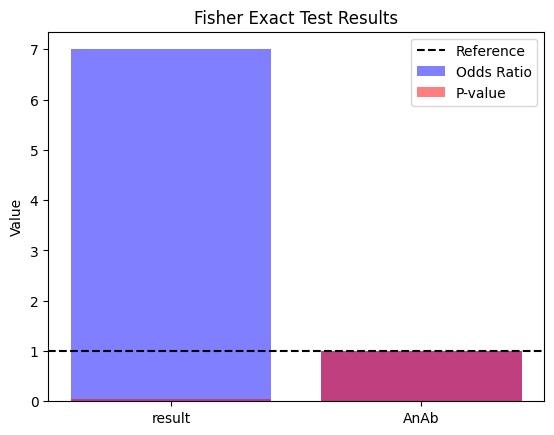

In [48]:
# Plot results
# Create a bar chart to display odds ratio and p-value
plt.bar(['result', 'AnAb'], [odds_ratio, 1], color='blue', alpha=0.5)
plt.bar(['result', 'AnAb'], [p_value, 1], color='red', alpha=0.5)

# Add a reference line at y=1
plt.axhline(y=1, color='black', linestyle='--')

# Set the y-axis label and chart title
plt.ylabel('Value')
plt.title('Fisher Exact Test Results')

# Add a legend
plt.legend(['Reference', 'Odds Ratio', 'P-value'])

# Display the chart
plt.show()

## Kruskal-Wallis test (equivalent of ANOVA)

/opt/homebrew/Caskroom/miniforge/base/envs/lupus/lib/python3.10/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Inf. Lateral Ventricle left volume %: Kruskal-Wallis test p-value = 0.02898598091688467
SCA left thickness mm: Kruskal-Wallis test p-value = 0.04154006700988525
Temporal thickness asymmetry: Kruskal-Wallis test p-value = 0.04154006700988525
MTG thickness asymmetry: Kruskal-Wallis test p-value = 0.036922061893465294
TMP thickness asymmetry: Kruskal-Wallis test p-value = 0.01011460727458917
AnG right thickness mm: Kruskal-Wallis test p-value = 0.004885056354422506
AnG right thickness norm.: Kruskal-Wallis test p-value = 0.03274867964999203
MOG left thickness mm: Kruskal-Wallis test p-value = 0.03274867964999203
MOG left thickness norm.: Kruskal-Wallis test p-value = 0.04154006700988525
result: Kruskal-Wallis test p-value = 3.4141735772975244e-07
Event_Mood abnormalities (depressive): Kruskal-Wallis test p-value = 0.01915824743246051
Event_nan: Kruskal-Wallis test p-value = 3.4141735772975244e-07


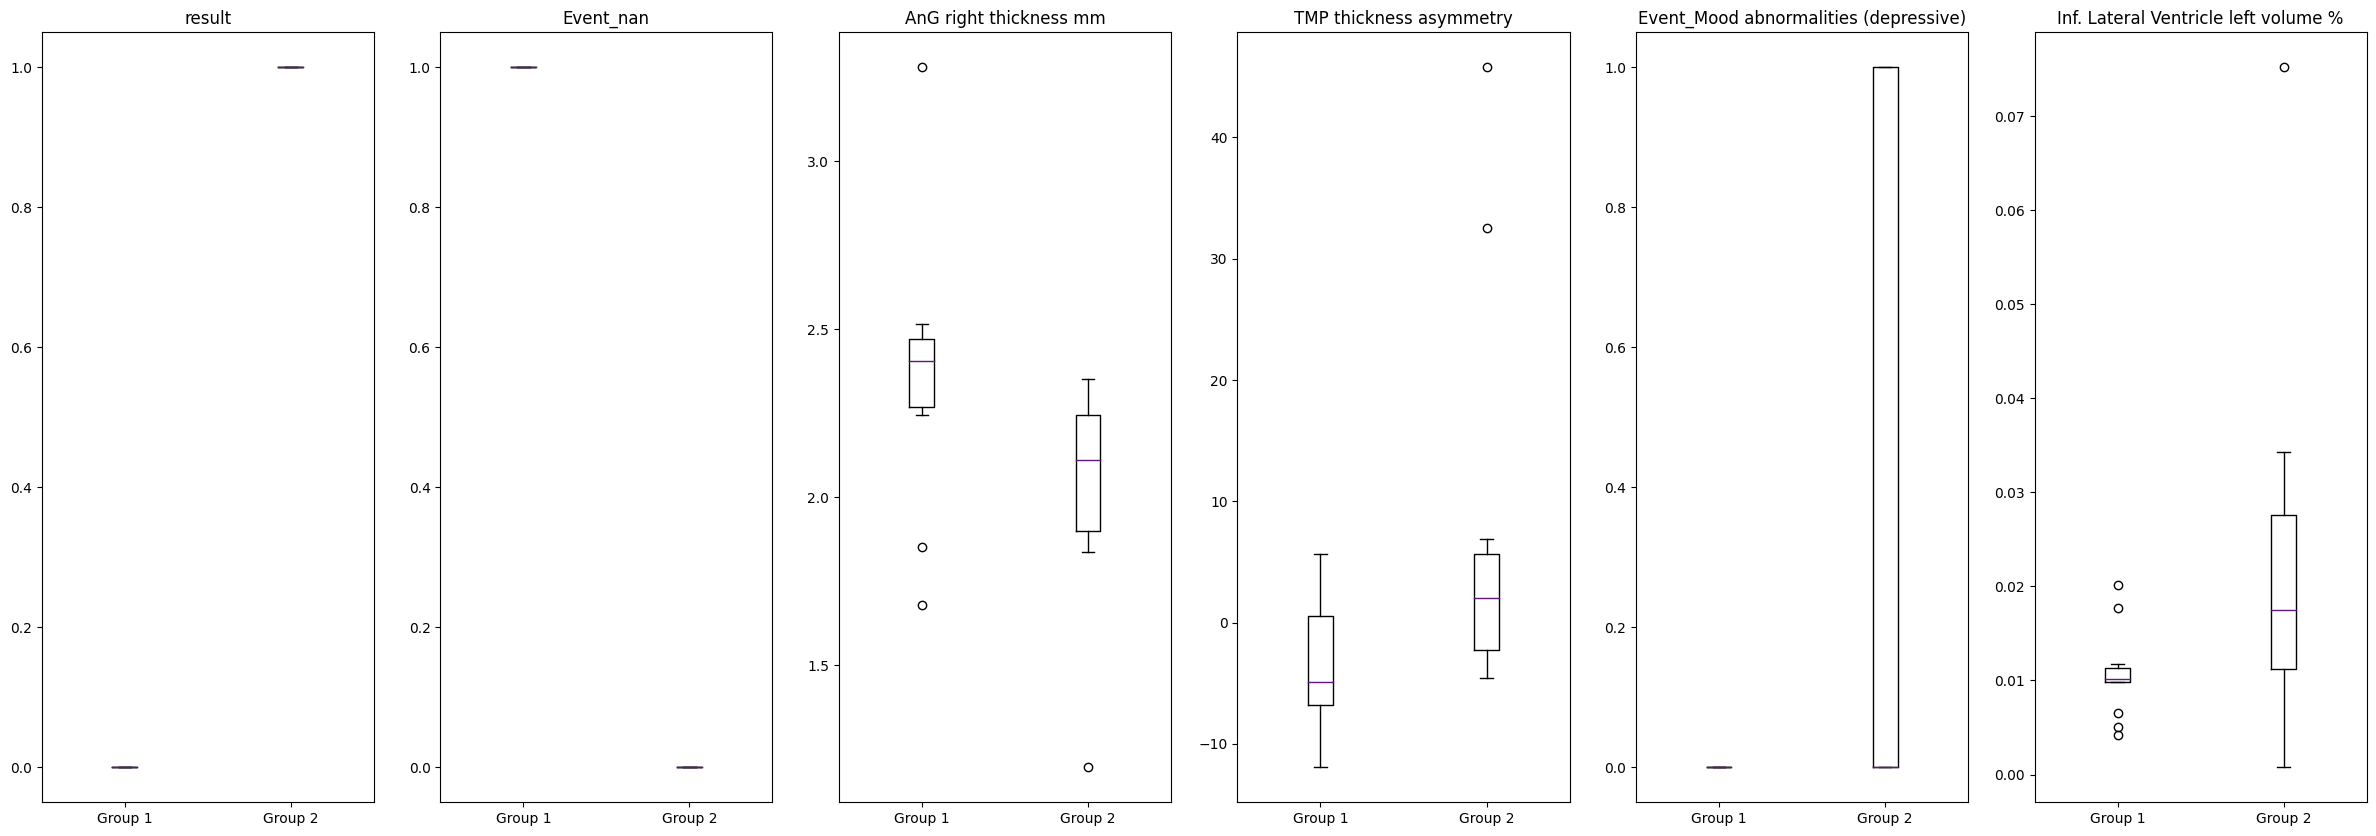

In [26]:
from scipy.stats import shapiro, kruskal

# Identify columns with interval data type 
interval_cols = [col for col in df.columns if pd.api.types.is_interval_dtype(df[col])]

# Handle interval data type
for col in interval_cols:
    df[col] = df[col].apply(lambda x: x.mid)

# Convert variables to float and fill missing values with the mean
df = df.astype(float)
df.fillna(df.mean(), inplace=True)

# Select variables of interest
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Abnormal Appearing White Matter volume cm3'
prednisone = 'prednisone_cat'
sledai = 'SLEDAI_cat'
mri_cols = list(df.columns[50:])

# Test for normality and perform Kruskal-Wallis test if normality is rejected
kruskal_results = {}
for var in df.columns:
    if var in [neurocog_cols + [prednisone, lesion_load, sledai]] + mri_cols:
        # Test for normality
        shapiro_pvalue = shapiro(df[var])[1]
        if shapiro_pvalue < 0.05:
            # Perform Kruskal-Wallis test if normality is rejected
            kruskal_pvalue = kruskal(df[df['result'] == 0][var], df[df['result'] == 1][var])[1]
            if kruskal_pvalue < 0.05:
                kruskal_results[var] = kruskal_pvalue
                
# Print the variables that show significant differences between groups
for var, p_value in kruskal_results.items():
    print(f"{var}: Kruskal-Wallis test p-value = {p_value}")

# Sort the significant variables by p-value
sorted_vars = sorted(kruskal_results, key=kruskal_results.get)[:6]
# Plot the five most significant variables
fig, axs = plt.subplots (1, 6, figsize= (30, 10))
for i in range (6):
    col = sorted_vars[i]
    axs[i].boxplot([group1[col], group2[col]])
    axs[i].set_xticklabels(['Group 1','Group 2'])
    axs[i].set_title(col)
# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/Kruskal.png', dpi=300, bbox_inches='tight')
plt.show()  
plt.close(fig)

# Parametric Tests

## T-Test

In [29]:
from scipy.stats import ttest_ind

# Select the columns you want to test
columns_to_test = ['C3 (mgdl)', 'Abnormal Appearing White Matter volume cm3', 'Disease duration (months)', 'Intracranial Cavity (IC) volume cm3']

# Conduct the hypothesis tests
p_values = {}
for column in columns_to_test:
    t_statistic, p_value = stats.ttest_1samp(df[column], 0)
    p_values[column] = p_value

# Print the p-values
print(p_values)

{'C3 (mgdl)': 4.253411176385658e-17, 'Abnormal Appearing White Matter volume cm3': 0.0022268203270311695, 'Disease duration (months)': 1.9720707760224625e-05, 'Intracranial Cavity (IC) volume cm3': 1.975335177027046e-27}


In [30]:
from statsmodels.sandbox.stats.multicomp import multipletests

# Apply the Holm-Bonferroni correction
_, p_values_corrected, _, _ = multipletests(list(p_values.values()), method='holm')

# Print the corrected p-values
print(p_values_corrected)

[1.27602335e-16 2.22682033e-03 3.94414155e-05 7.90134071e-27]


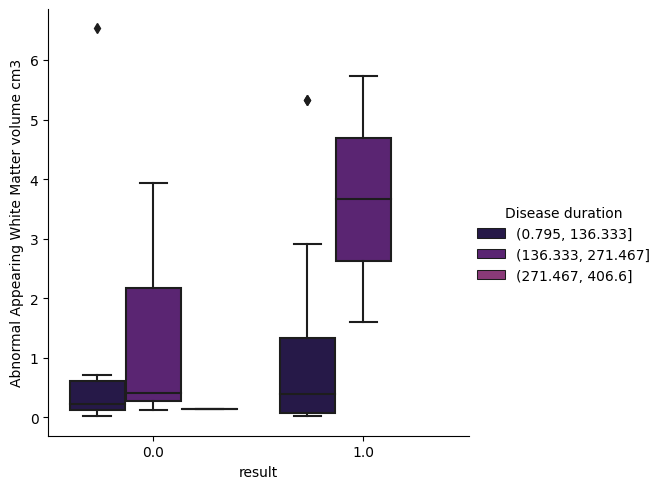

In [27]:
# Plot stats
df['Disease duration'] = pd.cut(df['Disease duration (months)'], bins=3)

sns.catplot(x='result', y='Abnormal Appearing White Matter volume cm3', hue='Disease duration',data=df, kind='box')
# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/T_test_white_duration_NP.png', dpi=300, bbox_inches='tight')
plt.show()  
plt.close(fig)

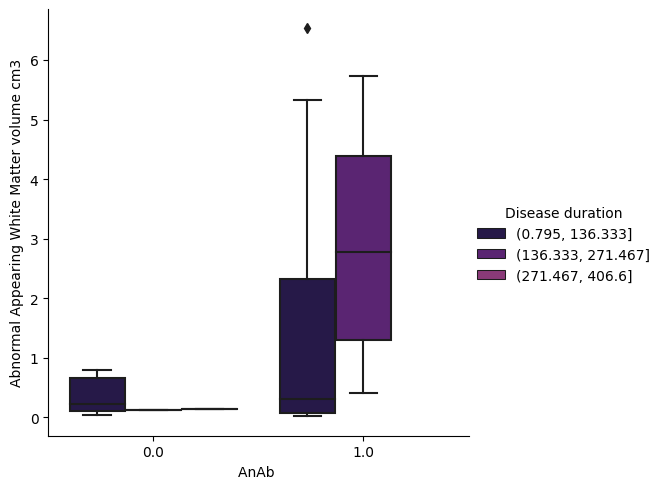

In [28]:
df['Disease duration'] = pd.cut(df['Disease duration (months)'], bins=3)

sns.catplot(x='AnAb ', y='Abnormal Appearing White Matter volume cm3', hue='Disease duration',data=df, kind='box')
# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/T_test_white_duration_AnAb.png', dpi=300, bbox_inches='tight')
plt.show()  
plt.close(fig)

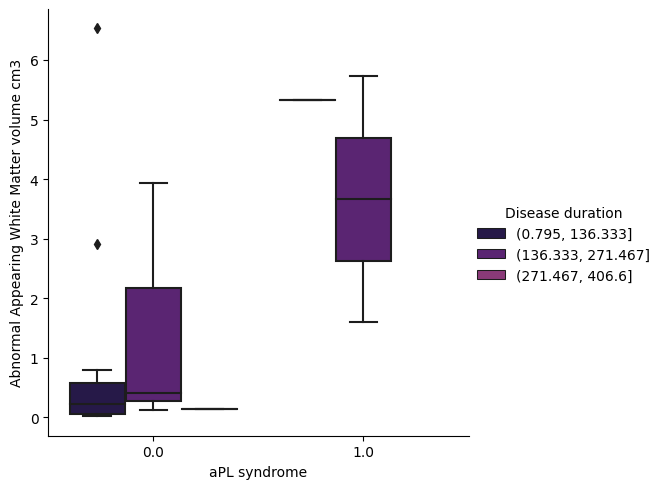

In [29]:
df['Disease duration'] = pd.cut(df['Disease duration (months)'], bins=3)

sns.catplot(x='aPL syndrome', y='Abnormal Appearing White Matter volume cm3', hue='Disease duration',data=df, kind='box')
# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/T_test_white_duration_aPL.png', dpi=300, bbox_inches='tight')
plt.show()  
plt.close(fig)

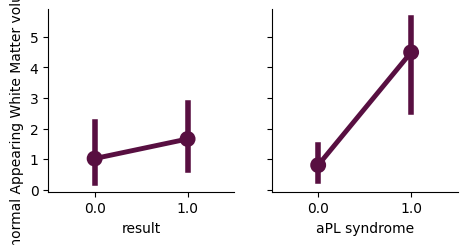

In [30]:
g = sns.PairGrid(df, y_vars='Abnormal Appearing White Matter volume cm3',x_vars=['result','aPL syndrome'])
g.map(sns.pointplot, scale=1.3, errwidth=4, color='xkcd:plum')
# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/T_test_white_aPL_NP.png', dpi=300, bbox_inches='tight')
plt.show()  
plt.close(fig)

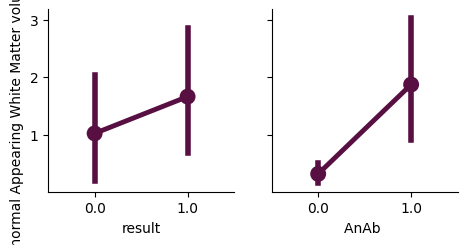

In [31]:
g = sns.PairGrid(df, y_vars='Abnormal Appearing White Matter volume cm3',x_vars=['result','AnAb '])
g.map(sns.pointplot, scale=1.3, errwidth=4, color='xkcd:plum')
# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/T_test_white_AnAb_NP.png', dpi=300, bbox_inches='tight')
plt.show()  
plt.close(fig)

In [37]:
# Define the columns to test
columns_to_test = df.columns[56:937]

# Create an empty dataframe to store the t-test results
#t_test_results = pd.DataFrame(columns=['Variable', 'T-statistic', 'p-value'])

relevant_columns = []

## Iterate over the columns
for column in columns_to_test:
    # Check if the column contains only numeric data
    if np.issubdtype(df[column].dtype, np.number):
        # Select the data for the two groups
        group1 = df[df['result'] == 0][column]
        group2 = df[df['result'] == 1][column]

        # Perform a t-test
        t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=True)

        # Print the results
        # Check if the p-value is below the significance level
        if p_val < 0.05:
            # Add the column to the list of relevant columns
            relevant_columns.append(column)
            print(f"Column: {column}, T-statistic: {t_stat:.3f}, p-value: {p_val:.5f}")
            
# Print the final list of relevant columns
print(f"Statistically significant: {relevant_columns}")
# Sort the significant variables by p-value
sorted_vars = [x for _, x in sorted(zip (p_values, significant_vars))]
# Plot the five most significant variables
fig, axs = plt.subplots (1, 6, figsize= (20, 5))
for i in range (6):
    col = sorted_vars[i]
    axs[i].boxplot([group1[col], group2[col]])
    axs[i].set_xticklabels(['Group 1','Group 2'])
    axs[i].set_title(col)
# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/Wilcoxon.png', dpi=300, bbox_inches='tight')
plt.show()  
plt.close(fig)

Column: Amygdala total volume %, T-statistic: -2.096, p-value: 0.04633
Column: Amygdala right volume %, T-statistic: -2.603, p-value: 0.01532
Column: OpIFG total volume cm3, T-statistic: 2.703, p-value: 0.01218
Column: OpIFG total volume %, T-statistic: 2.449, p-value: 0.02170
Column: OpIFG left volume cm3, T-statistic: 2.362, p-value: 0.02629
Column: OpIFG left volume %, T-statistic: 2.198, p-value: 0.03740
Column: MFC left volume %, T-statistic: 2.142, p-value: 0.04215
Column: SMC volume asymmetry, T-statistic: 2.833, p-value: 0.00898
Column: PT left volume %, T-statistic: -2.200, p-value: 0.03729
Column: TTG total volume cm3, T-statistic: 2.093, p-value: 0.04668
Column: TTG right volume cm3, T-statistic: 2.559, p-value: 0.01692
Column: TTG right volume %, T-statistic: 2.263, p-value: 0.03258
Column: Parietal volume asymmetry, T-statistic: 2.310, p-value: 0.02943
Column: Occipital total volume %, T-statistic: 2.492, p-value: 0.01970
Column: Occipital left volume cm3, T-statistic: 2.1

## Perfom One-Way ANOVA test

In [21]:
# Perform the one-way ANOVA test

cols_to_test = df[['Brain (WM+GM) volume cm3','result']].dropna()
test_results = stats.f_oneway(*[cols_to_test[col] for col in cols_to_test])

# Print the results
print('One-way ANOVA test results:')
print('--------------------------')
print('F-statistic:', test_results.statistic)
print('p-value:', test_results.pvalue)

One-way ANOVA test results:
--------------------------
F-statistic: 2272.4127468901834
p-value: 1.3756951442876907e-44


In [25]:
## perform post-hoc tests (e.g., Tukey's HSD test) to determine which specific groups are different from each other.

import statsmodels.stats.multicomp as mc

# Create a list of your group labels
group_labels = ['Event', 'N_Event']

# Perform Tukey's HSD test
tukey = mc.MultiComparison(df['Brain (WM+GM) volume cm3'], df['result'])
tukey_result = tukey.tukeyhsd()

# Print the results
print(tukey_result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper  reject
------------------------------------------------------
   0.0    1.0  -41.813 0.3686 -135.8546 52.2287  False
------------------------------------------------------


In [24]:
# Perform the one-way ANOVA test

cols_to_test = df[['Abnormal Appearing White Matter volume cm3','result']].dropna()
test_results = stats.f_oneway(*[cols_to_test[col] for col in cols_to_test])

# Print the results
print('One-way ANOVA test results:')
print('--------------------------')
print('F-statistic:', test_results.statistic)
print('p-value:', test_results.pvalue)

One-way ANOVA test results:
--------------------------
F-statistic: 2272.4127468901834
p-value: 1.3756951442876907e-44


In [23]:
# Perform Tukey's HSD test
tukey = mc.MultiComparison(df['Abnormal Appearing White Matter volume cm3'], df['result'])
tukey_result = tukey.tukeyhsd()

# Print the results
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
   0.0    1.0   0.6404 0.4334 -1.016 2.2968  False
--------------------------------------------------


In [27]:
# Perform the one-way ANOVA test

cols_to_test = df[['Cerebro Spinal Fluid (CSF) volume cm3','result']].dropna()
test_results = stats.f_oneway(*[cols_to_test[col] for col in cols_to_test])

# Print the results
print('One-way ANOVA test results:')
print('--------------------------')
print('F-statistic:', test_results.statistic)
print('p-value:', test_results.pvalue)

One-way ANOVA test results:
--------------------------
F-statistic: 451.0553694686477
p-value: 2.7459805974048968e-27


In [26]:
# Perform Tukey's HSD test
tukey = mc.MultiComparison(df['Cerebro Spinal Fluid (CSF) volume cm3'], df['result'])
tukey_result = tukey.tukeyhsd()

# Print the results
print(tukey_result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   0.0    1.0  17.4404 0.2552 -13.4037 48.2845  False
-----------------------------------------------------


In [28]:
# Perform the one-way ANOVA test

cols_to_test = df[['Grey Matter (GM) volume cm3','result']].dropna()
test_results = stats.f_oneway(*[cols_to_test[col] for col in cols_to_test])

# Print the results
print('One-way ANOVA test results:')
print('--------------------------')
print('F-statistic:', test_results.statistic)
print('p-value:', test_results.pvalue)

One-way ANOVA test results:
--------------------------
F-statistic: 2986.2462807530032
p-value: 1.298221775526677e-47


In [27]:
# Perform Tukey's HSD test
tukey = mc.MultiComparison(df['Grey Matter (GM) volume cm3'], df['result'])
tukey_result = tukey.tukeyhsd()

# Print the results
print(tukey_result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   0.0    1.0 -26.4167 0.2501 -72.6204 19.7869  False
-----------------------------------------------------


In [28]:
# Perform the one-way ANOVA test

cols_to_test = df[['SCA thickness asymmetry','result']].dropna()
test_results = stats.f_oneway(*[cols_to_test[col] for col in cols_to_test])

# Print the results
print('One-way ANOVA test results:')
print('--------------------------')
print('F-statistic:', test_results.statistic)
print('p-value:', test_results.pvalue)

One-way ANOVA test results:
--------------------------
F-statistic: 0.0014046980254648301
p-value: 0.9702463601481939


In [29]:
# Perform Tukey's HSD test
tukey = mc.MultiComparison(df['SCA thickness asymmetry'], df['result'])
tukey_result = tukey.tukeyhsd()

# Print the results
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   0.0    1.0  11.0198 0.0064 3.4011 18.6386   True
---------------------------------------------------


## F-Distribution

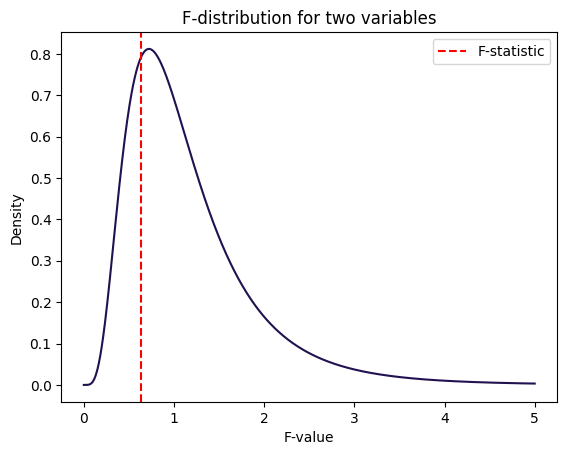

In [32]:
# Calculate F-statistic using stats.f_oneway
F, p = stats.f_oneway(df[df['result']==0]['Abnormal Appearing White Matter volume cm3'],
                      df[df['result']==1]['Abnormal Appearing White Matter volume cm3'])

# Define degrees of freedom
dfn = len(df[df['result']==0]['Abnormal Appearing White Matter volume cm3']) - 1
dfd = len(df[df['result']==1]['Abnormal Appearing White Matter volume cm3']) - 1

# Define x range for plotting
x = np.linspace(0, 5, 1000)

# Calculate F-distribution for given degrees of freedom
y = stats.f.pdf(x, dfn, dfd)

# Plot F-distribution
plt.plot(x, y)
plt.xlabel('F-value')
plt.ylabel('Density')
plt.title('F-distribution for two variables')
plt.axvline(F, color='r', linestyle='--', label='F-statistic')
plt.legend()
plt.show()

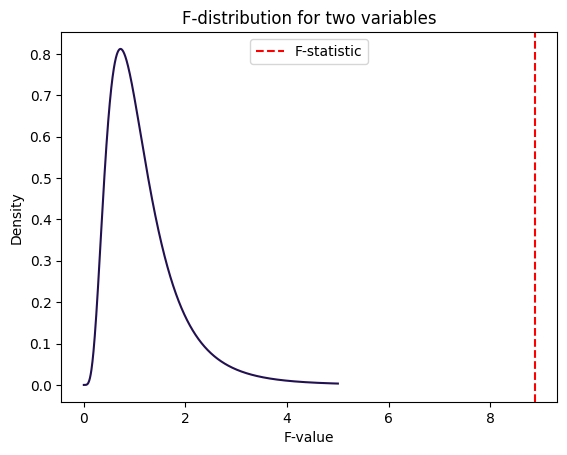

In [35]:
# Calculate F-statistic using stats.f_oneway
F, p = stats.f_oneway(df[df['result']==0]['SCA thickness asymmetry'],
                      df[df['result']==1]['SCA thickness asymmetry'])

# Define degrees of freedom
dfn = len(df[df['result']==0]['SCA thickness asymmetry']) - 1
dfd = len(df[df['result']==1]['SCA thickness asymmetry']) - 1

# Define x range for plotting
x = np.linspace(0, 5, 1000)

# Calculate F-distribution for given degrees of freedom
y = stats.f.pdf(x, dfn, dfd)

# Plot F-distribution
plt.plot(x, y)
plt.xlabel('F-value')
plt.ylabel('Density')
plt.title('F-distribution for two variables')
plt.axvline(F, color='r', linestyle='--', label='F-statistic')
plt.legend()
# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/F_dist_NP_SCA.png', dpi=300, bbox_inches='tight')
plt.show()  
plt.close(fig)

## Chi Square

In [29]:
from scipy.stats import chi2_contingency

# Select the categorical variable to analyze
cat_var = df['aPL syndrome']

# Create a contingency table
cont_table = pd.crosstab(cat_var, df['result'])

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(cont_table)

# Print the results
print(f"Chi-square value: {chi2:.2f}")
print(f"P-value: {pval:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected values:")
print(expected)

Chi-square value: 2.39
P-value: 0.1221
Degrees of freedom: 1
Expected values:
[[11.07407407 11.92592593]
 [ 1.92592593  2.07407407]]


In [30]:
from scipy.stats import chi2_contingency

# Select the categorical variable to analyze
cat_var = df['AnAb ']

# Create a contingency table
cont_table = pd.crosstab(cat_var, df['result'])

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(cont_table)

# Print the results
print(f"Chi-square value: {chi2:.2f}")
print(f"P-value: {pval:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected values:")
print(expected)

Chi-square value: 3.13
P-value: 0.0767
Degrees of freedom: 1
Expected values:
[[4.33333333 4.66666667]
 [8.66666667 9.33333333]]


## Neurocognitive z-scores of specific clinical domains and total neurocognitive z-score were correlated with lesion load across the subject groups using Pearson correlation. Adjusted for prednisone therapy (mg/day) and SLEDAI as partial correlations

Event_CVA vs Abnormal Appearing White Matter volume cm3: r = 0.38, p = 0.05
Event_CVA vs Abnormal Appearing White Matter volume cm3 (partial corr): r = 0.56, p = 0.00
total_neurocog vs Abnormal Appearing White Matter volume cm3: r = 0.16, p = 0.43
result vs Abnormal Appearing White Matter volume cm3 (partial corr): r = 0.30, p = 0.15


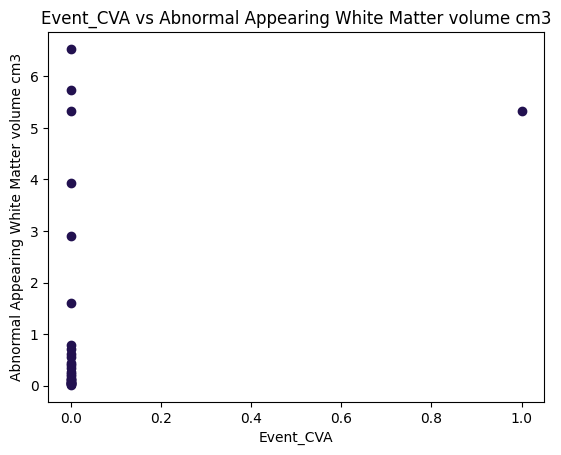

<Figure size 640x480 with 0 Axes>

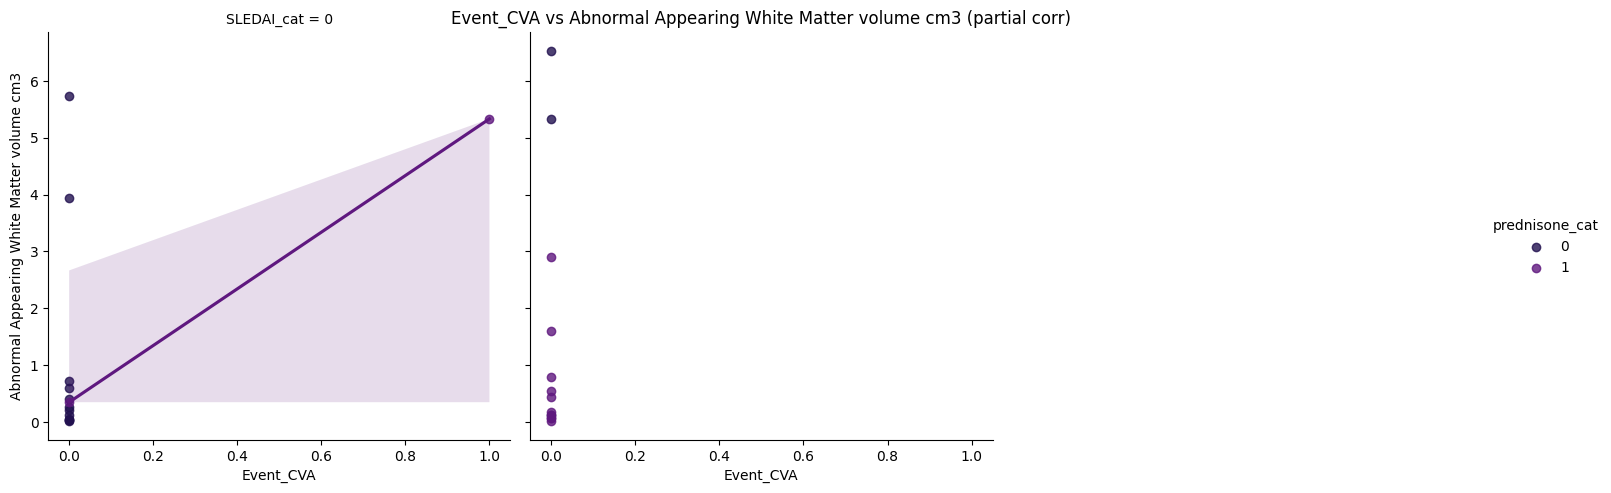

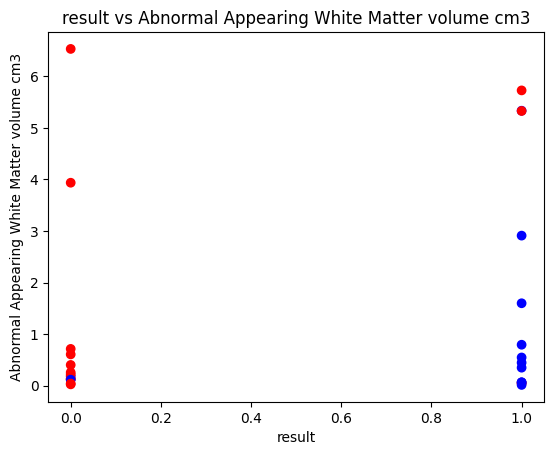

<Figure size 640x480 with 0 Axes>

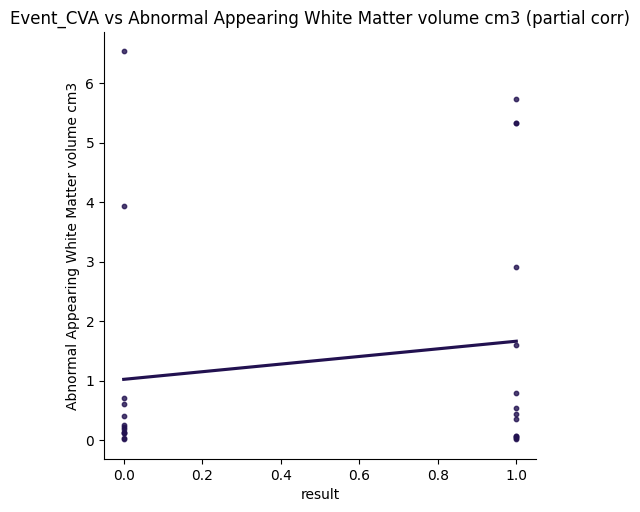

Event_Mood abnormalities (depressive) vs Abnormal Appearing White Matter volume cm3: r = -0.25, p = 0.21
Event_Mood abnormalities (depressive) vs Abnormal Appearing White Matter volume cm3 (partial corr): r = -0.24, p = 0.24
total_neurocog vs Abnormal Appearing White Matter volume cm3: r = 0.16, p = 0.43
result vs Abnormal Appearing White Matter volume cm3 (partial corr): r = 0.30, p = 0.15


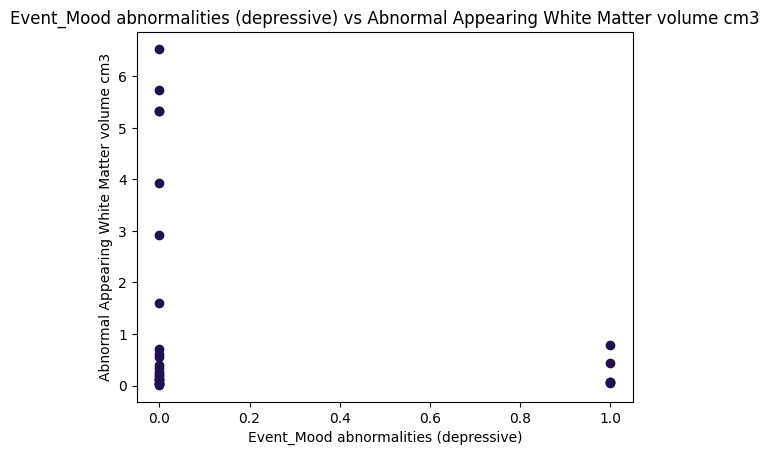

<Figure size 640x480 with 0 Axes>

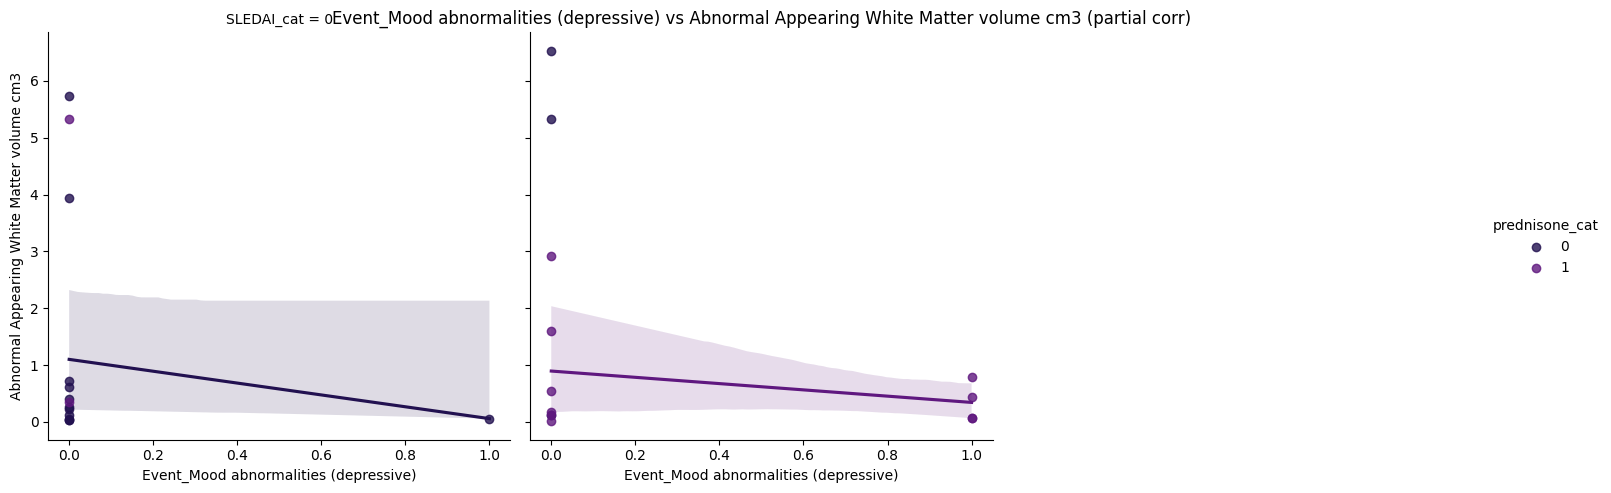

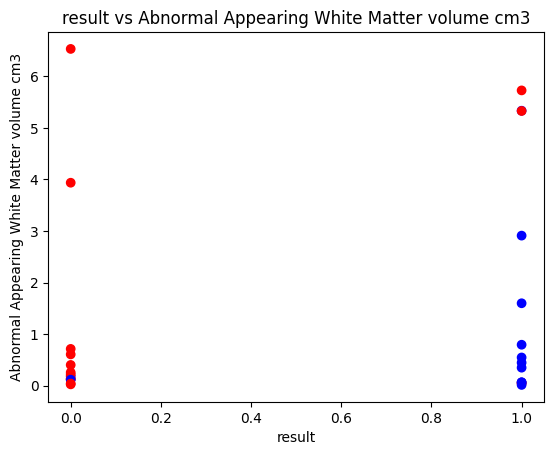

<Figure size 640x480 with 0 Axes>

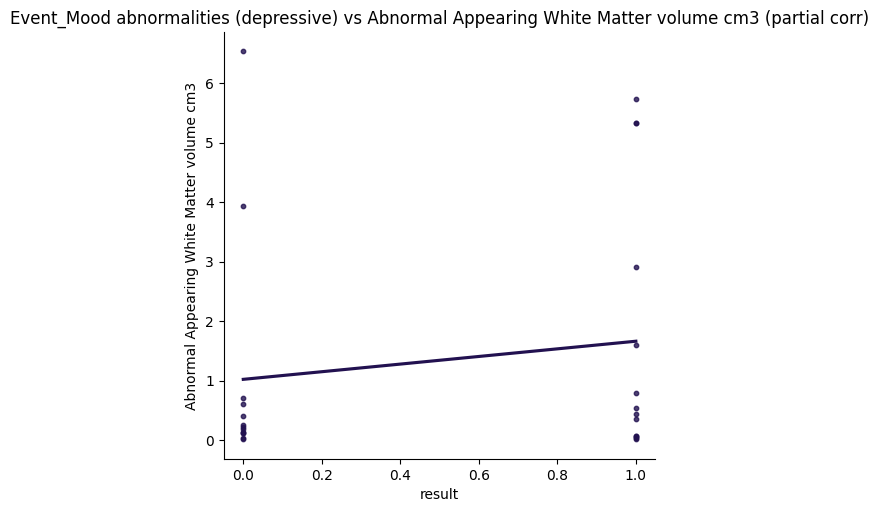

Event_Mood abnormalities (mixed) vs Abnormal Appearing White Matter volume cm3: r = -0.13, p = 0.52
Event_Mood abnormalities (mixed) vs Abnormal Appearing White Matter volume cm3 (partial corr): r = -0.12, p = 0.57
total_neurocog vs Abnormal Appearing White Matter volume cm3: r = 0.16, p = 0.43
result vs Abnormal Appearing White Matter volume cm3 (partial corr): r = 0.30, p = 0.15


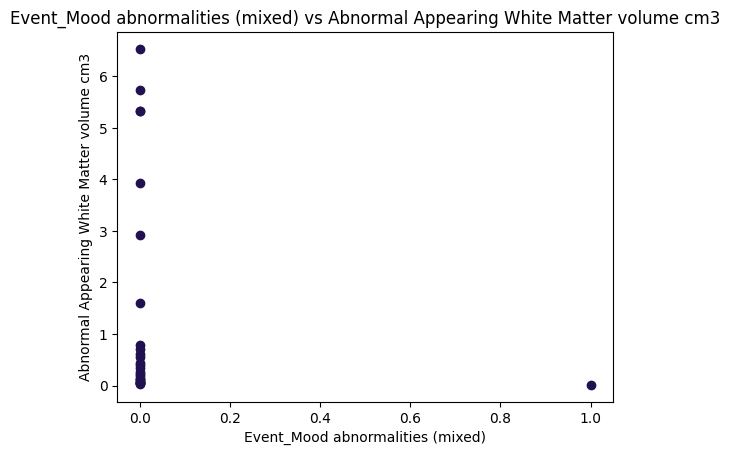

<Figure size 640x480 with 0 Axes>

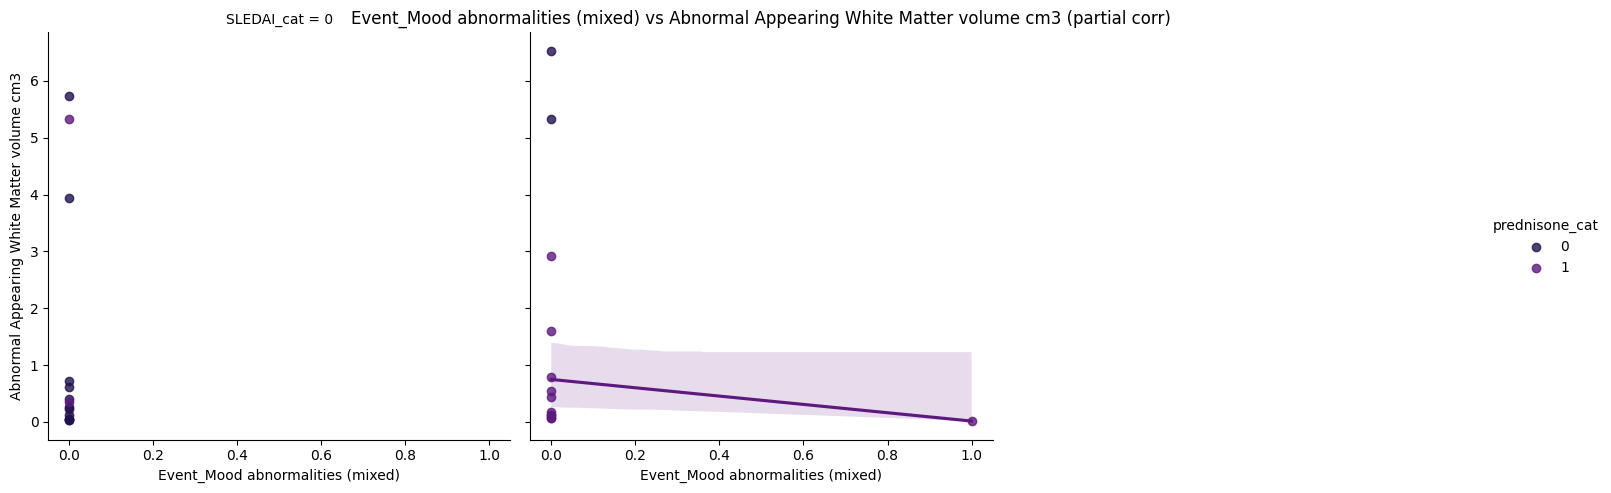

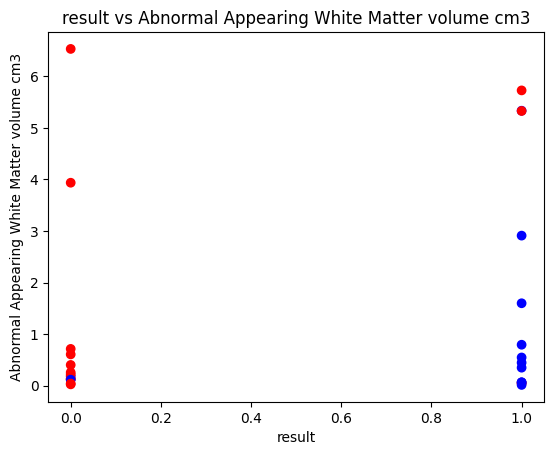

<Figure size 640x480 with 0 Axes>

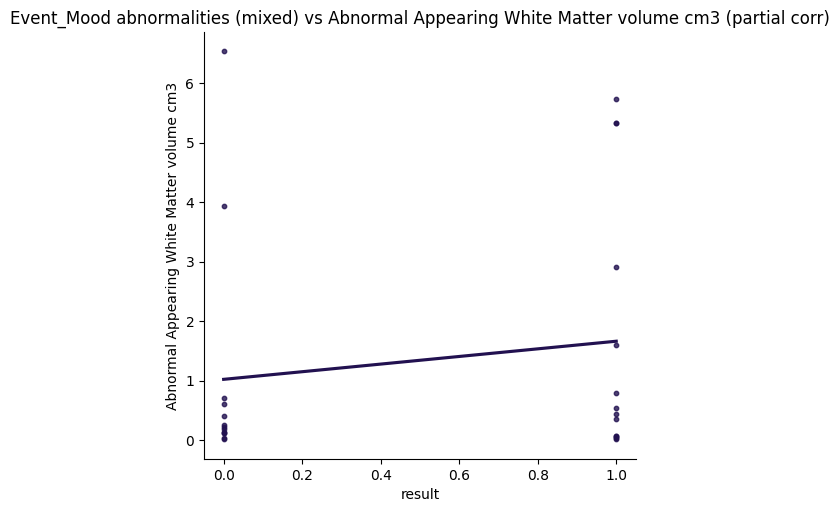

Event_Movement Disorder vs Abnormal Appearing White Matter volume cm3: r = -0.08, p = 0.70
Event_Movement Disorder vs Abnormal Appearing White Matter volume cm3 (partial corr): r = -0.06, p = 0.76
total_neurocog vs Abnormal Appearing White Matter volume cm3: r = 0.16, p = 0.43
result vs Abnormal Appearing White Matter volume cm3 (partial corr): r = 0.30, p = 0.15


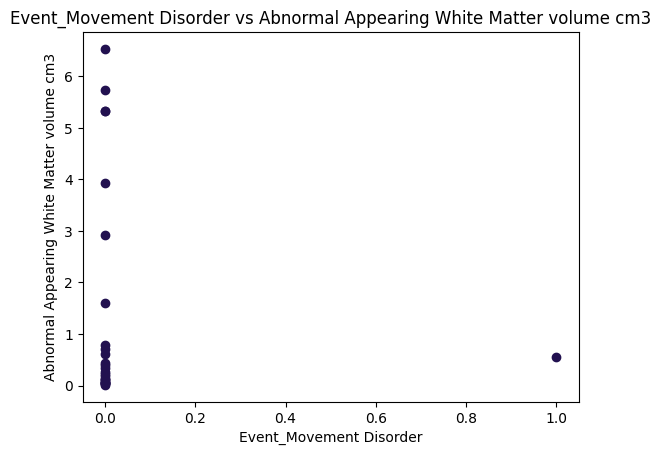

<Figure size 640x480 with 0 Axes>

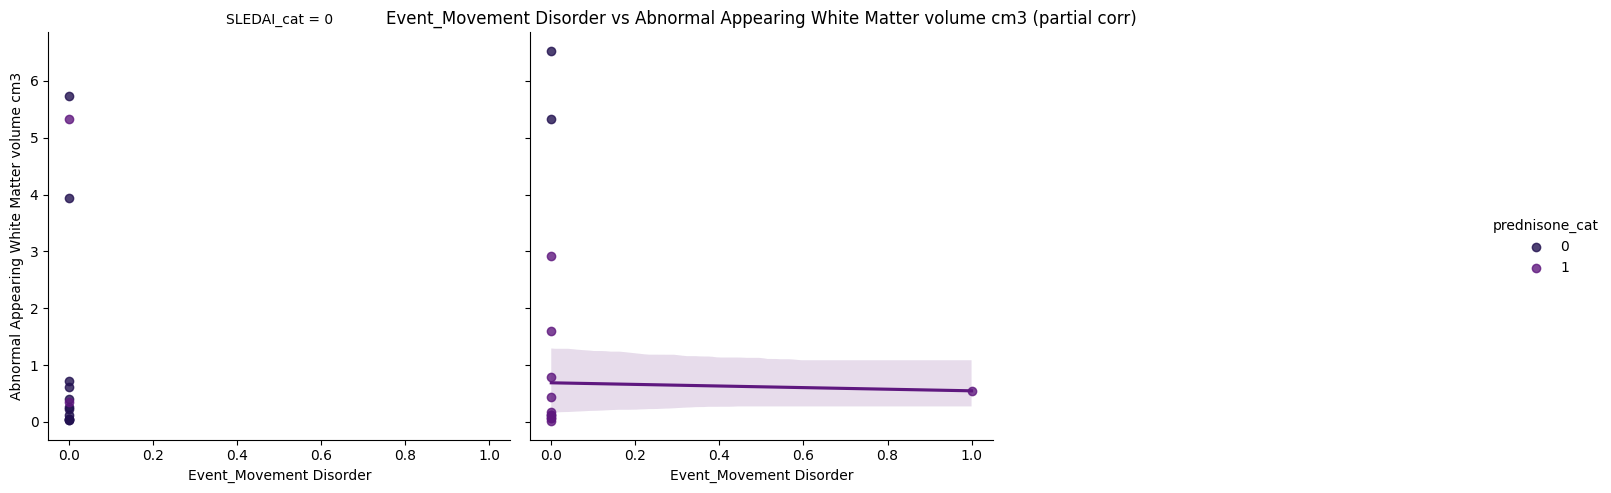

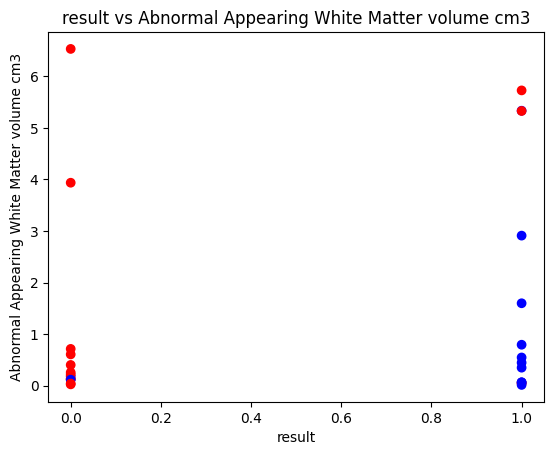

<Figure size 640x480 with 0 Axes>

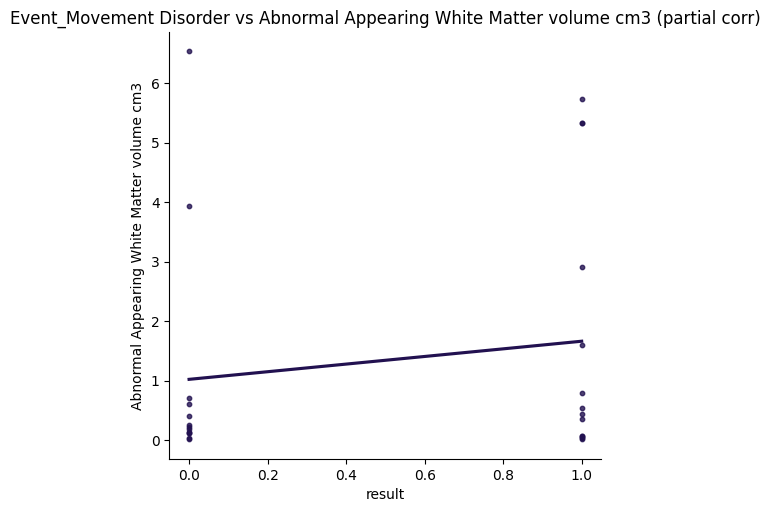

Event_Psychosis vs Abnormal Appearing White Matter volume cm3: r = -0.05, p = 0.79
Event_Psychosis vs Abnormal Appearing White Matter volume cm3 (partial corr): r = 0.04, p = 0.87
total_neurocog vs Abnormal Appearing White Matter volume cm3: r = 0.16, p = 0.43
result vs Abnormal Appearing White Matter volume cm3 (partial corr): r = 0.30, p = 0.15


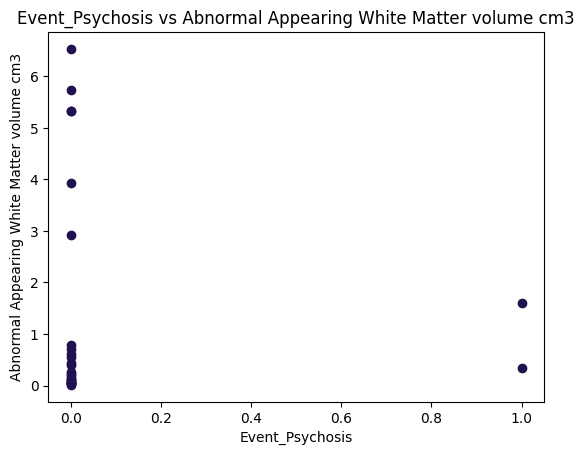

<Figure size 640x480 with 0 Axes>

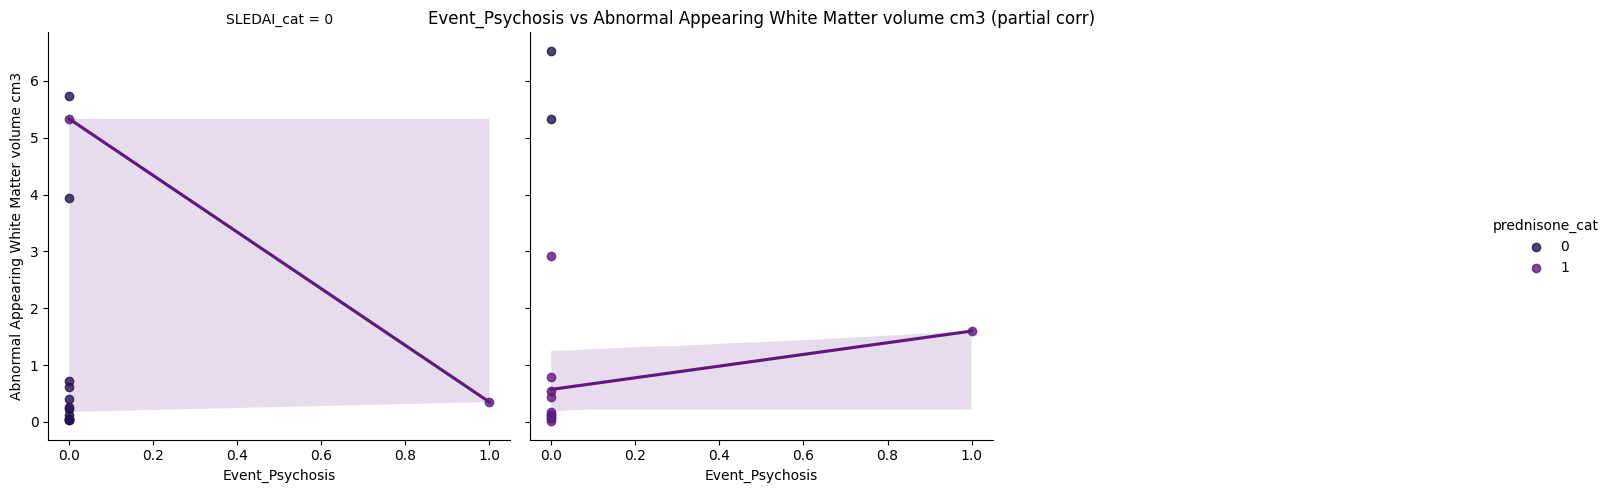

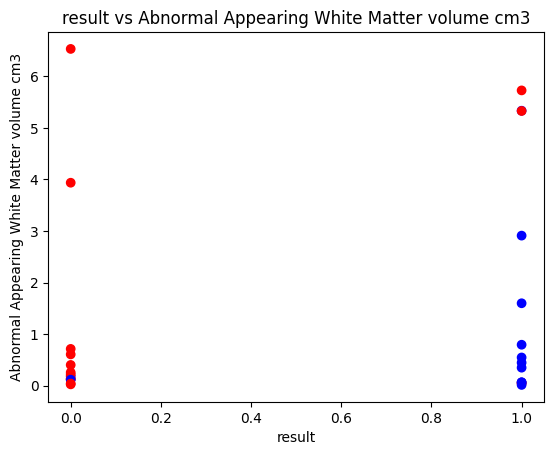

<Figure size 640x480 with 0 Axes>

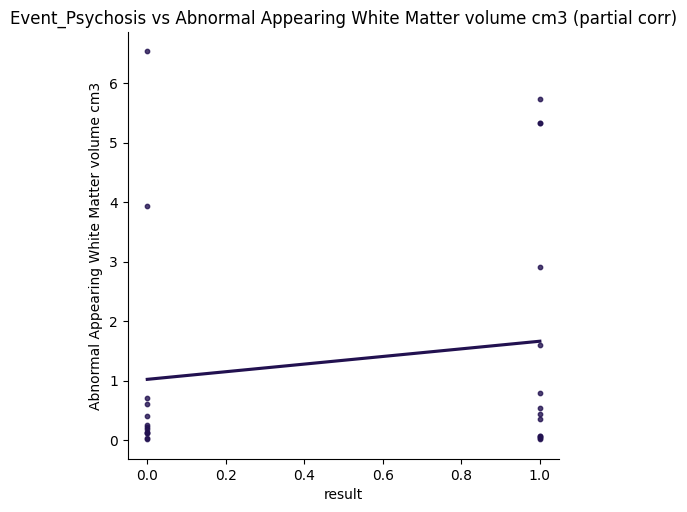

Event_Seizure vs Abnormal Appearing White Matter volume cm3: r = 0.27, p = 0.18
Event_Seizure vs Abnormal Appearing White Matter volume cm3 (partial corr): r = 0.28, p = 0.18
total_neurocog vs Abnormal Appearing White Matter volume cm3: r = 0.16, p = 0.43
result vs Abnormal Appearing White Matter volume cm3 (partial corr): r = 0.30, p = 0.15


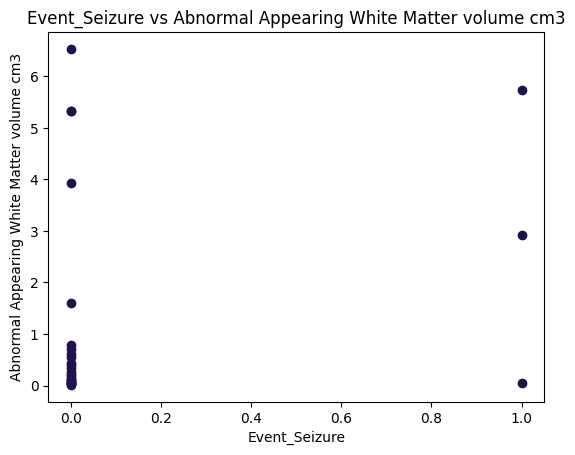

<Figure size 640x480 with 0 Axes>

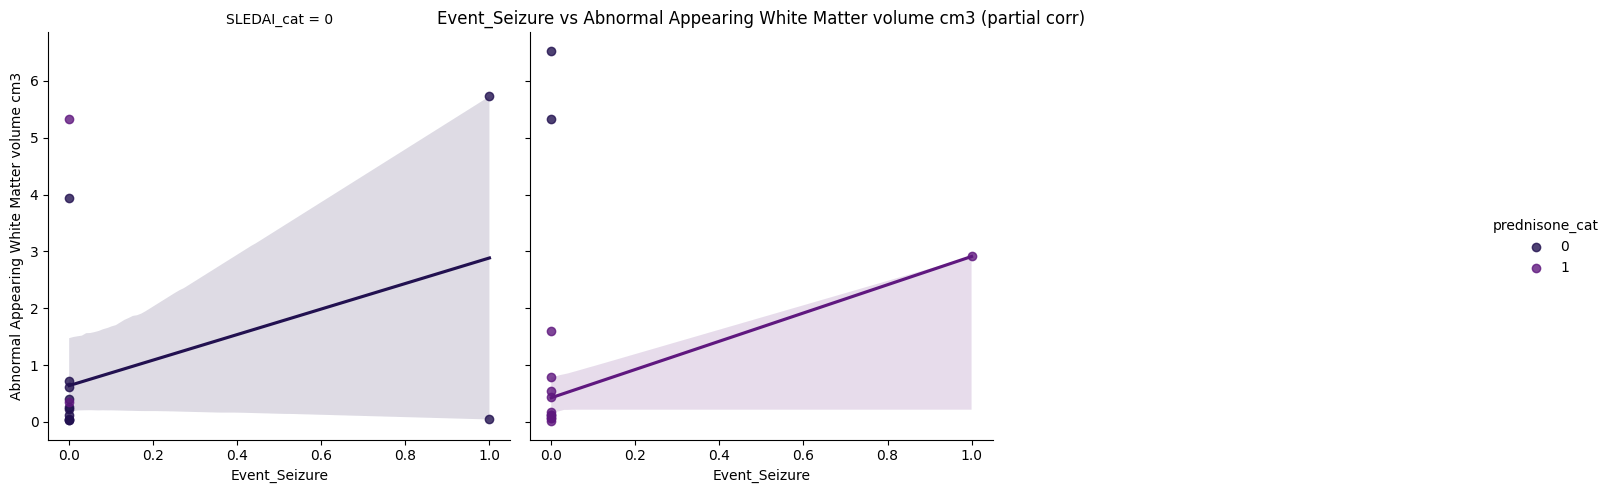

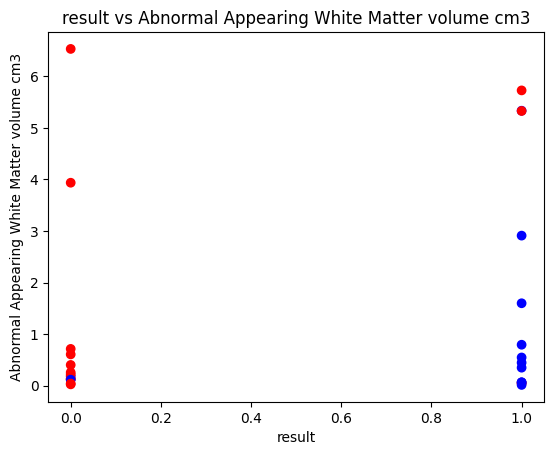

<Figure size 640x480 with 0 Axes>

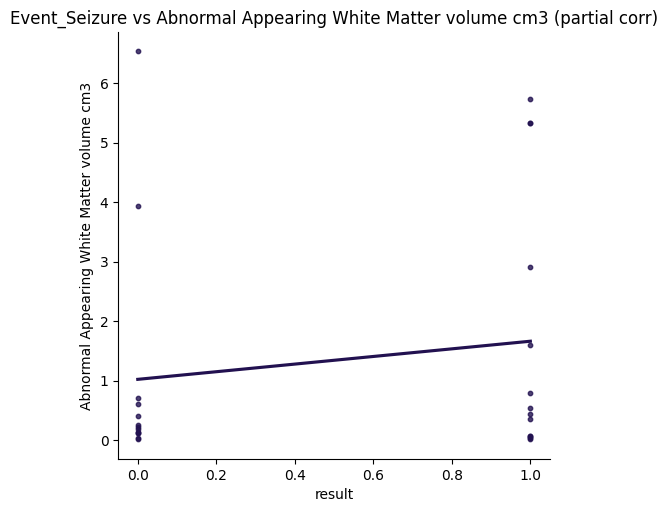

Event_Seizure, ACS, myelitis, CVA vs Abnormal Appearing White Matter volume cm3: r = 0.38, p = 0.05
Event_Seizure, ACS, myelitis, CVA vs Abnormal Appearing White Matter volume cm3 (partial corr): r = 0.33, p = 0.10
total_neurocog vs Abnormal Appearing White Matter volume cm3: r = 0.16, p = 0.43
result vs Abnormal Appearing White Matter volume cm3 (partial corr): r = 0.30, p = 0.15


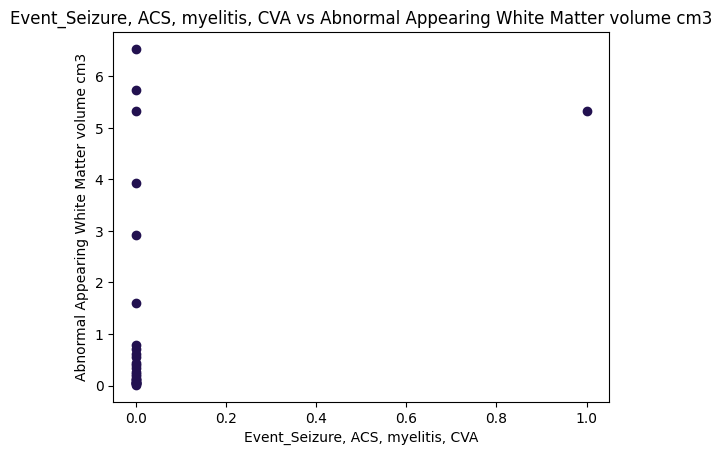

<Figure size 640x480 with 0 Axes>

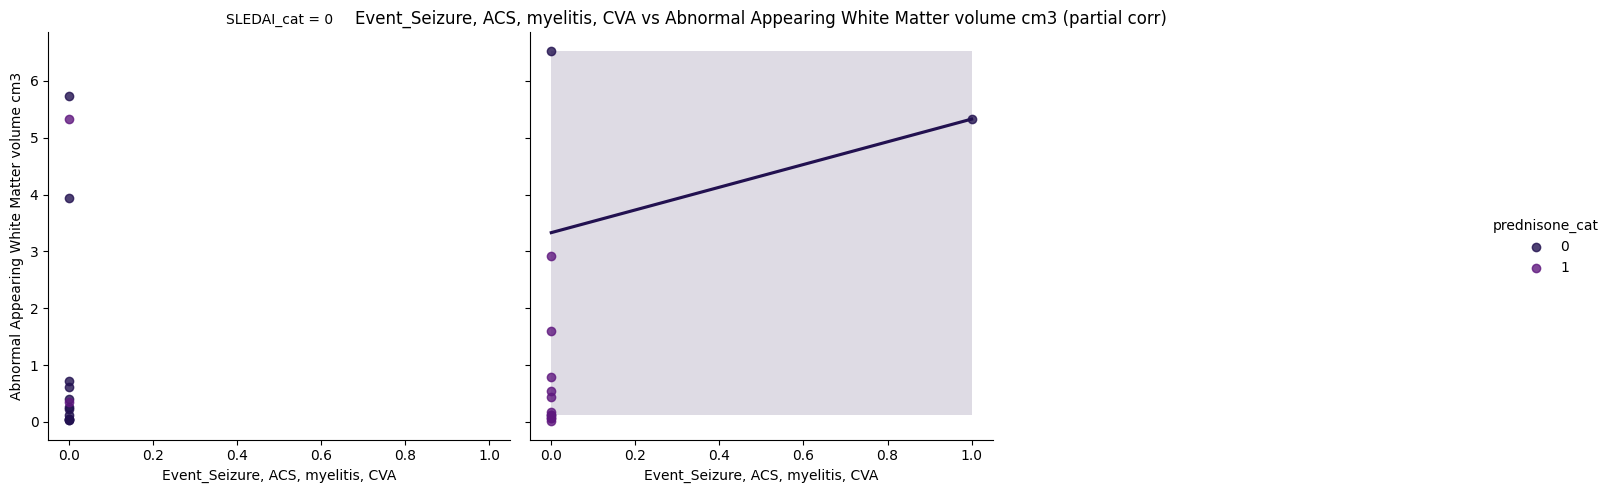

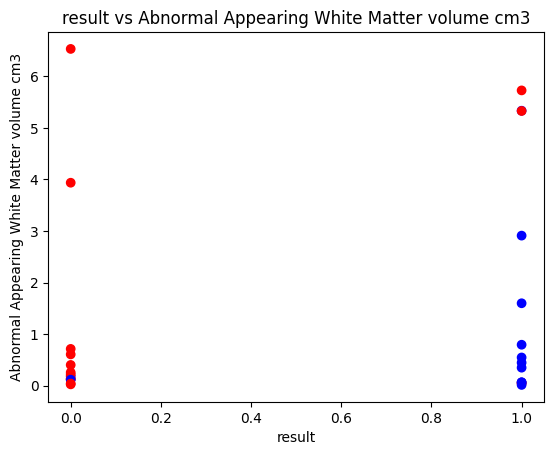

<Figure size 640x480 with 0 Axes>

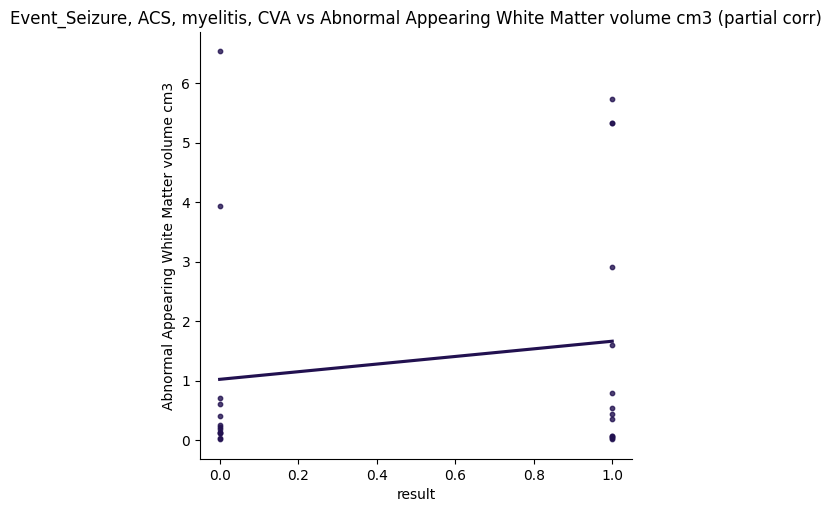

Abnormal Appearing White Matter volume cm3 vs Abnormal Appearing White Matter volume cm3: r = 1.00, p = 0.00
total_neurocog vs Abnormal Appearing White Matter volume cm3: r = 0.16, p = 0.43
result vs Abnormal Appearing White Matter volume cm3 (partial corr): r = 0.30, p = 0.15


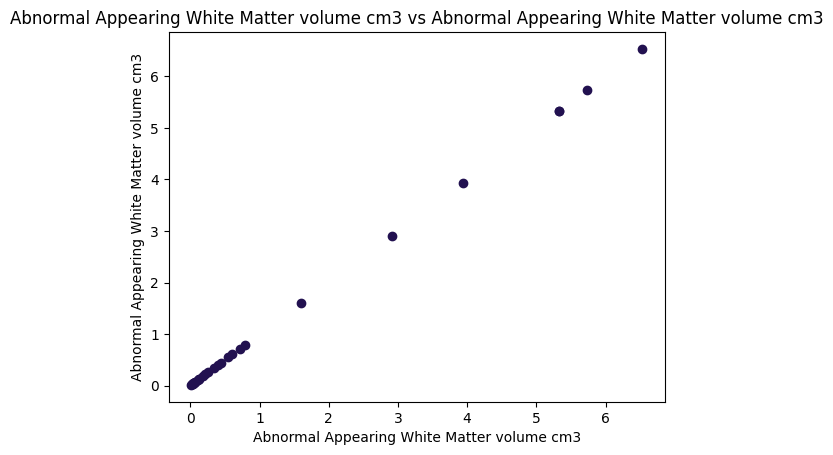

<Figure size 640x480 with 0 Axes>

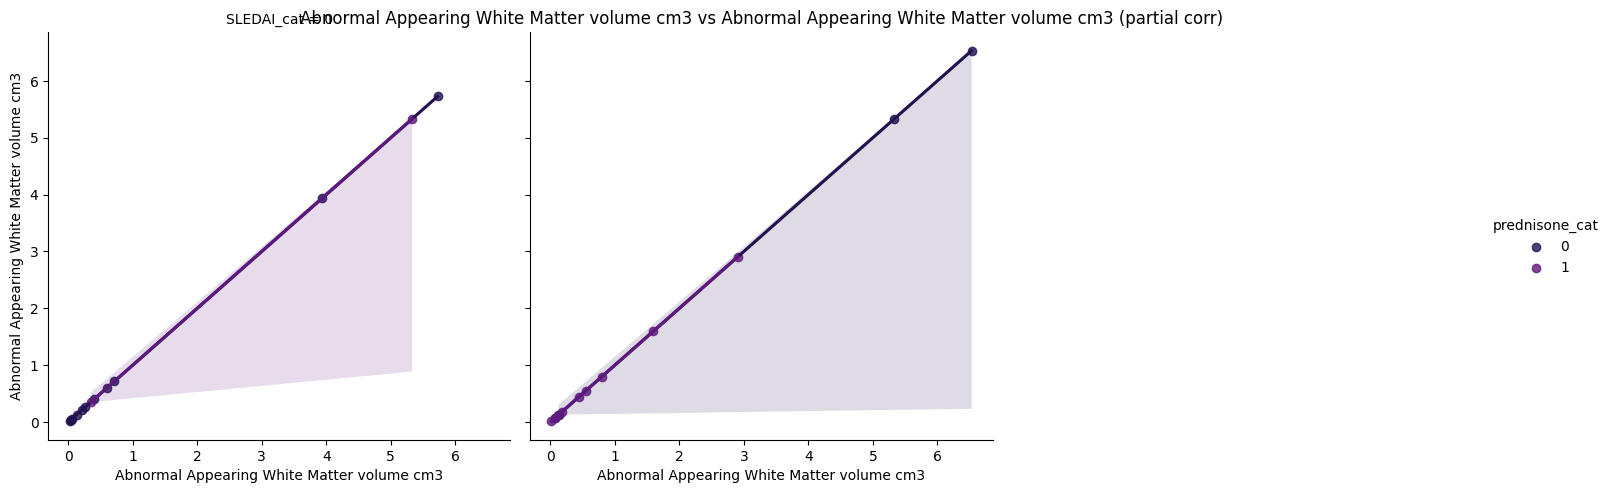

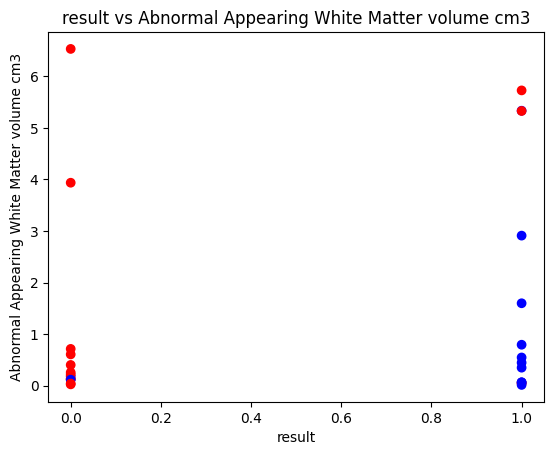

<Figure size 640x480 with 0 Axes>

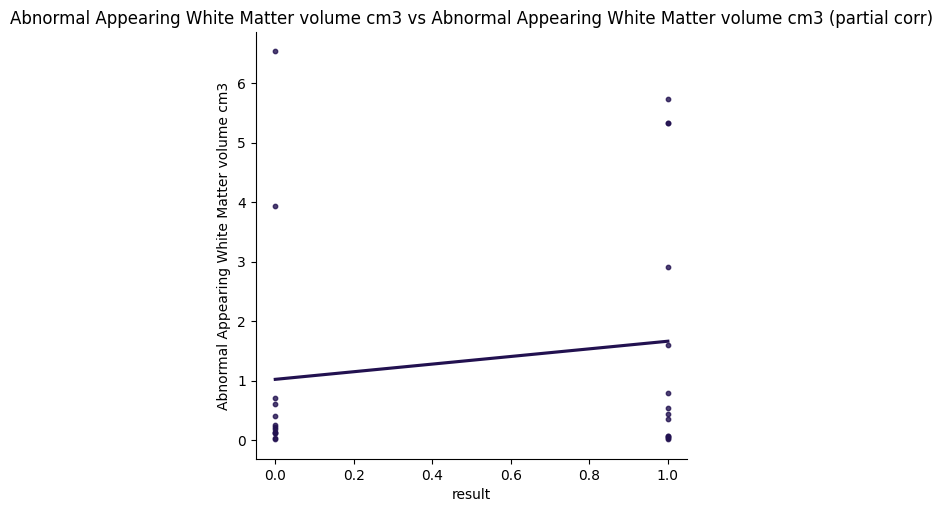

In [32]:
from scipy.stats import pearsonr
import pingouin as pg

df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)
# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Abnormal Appearing White Matter volume cm3'
prednisone = 'prednisone_cat'
sledai = 'SLEDAI_cat'

# Compute the correlations
for col in neurocog_cols + [lesion_load]:
    # Compute the Pearson correlation between each neurocognitive domain and lesion load
    r, p = pearsonr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and SLEDAI
    if col != lesion_load:
        partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, sledai])
        r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
        print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
        assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

    # Compute the Pearson correlation between total neurocognitive score and lesion load
    r_total, p_total = pearsonr(df['result'], df[lesion_load])
    print(f'total_neurocog vs {lesion_load}: r = {r_total:.2f}, p = {p_total:.2f}')

    # Compute the partial correlation adjusting for prednisone and SLEDAI
    total_partial_results = pg.partial_corr(data=df, x='result', y=lesion_load, covar=[prednisone, sledai])
    r_total_partial, p_total_partial = total_partial_results['r'][0], total_partial_results['p-val'][0]
    print(f'result vs {lesion_load} (partial corr): r = {r_total_partial:.2f}, p = {p_total_partial:.2f}')


    # Plot the scatter plot
    plt.figure()
    plt.scatter(df[col], df[lesion_load])
    plt.xlabel(col)
    plt.ylabel(lesion_load)
    plt.title(f'{col} vs {lesion_load}')
    plt.show()

    # Plot the partial scatter plot
    plt.figure()
    sns.lmplot(data=df, x=col, y=lesion_load, hue=prednisone, col=sledai, col_wrap=3)
    plt.title(f'{col} vs {lesion_load} (partial corr)')
    plt.show()
    
    colors = ['red' if p == 0 else 'blue' for p in df[prednisone]]
    # Plot the scatter plot of total neurocognitive score vs lesion load
    plt.figure()
    plt.scatter(df['result'], df[lesion_load], c=colors)
    plt.xlabel('result')
    plt.ylabel(lesion_load)
    plt.title(f'result vs {lesion_load}')
    plt.show()

    # Plot the partial scatter plot of total neurocognitive score vs lesion load
    plt.figure()
    sns.lmplot(data=df, x='result', y=lesion_load, ci=None, scatter_kws={"s": 10})
    plt.title(f'{col} vs {lesion_load} (partial corr)')
    plt.show()

## Adjustment for covariates by analysis of covariance (ANCOVA)

In [33]:
# define the dependent and independent variables
y = df['result']
X = df[['SCA thickness asymmetry', 'Temporal thickness asymmetry', 'Anti-Rib-P','TMP thickness asymmetry', 'MTG thickness asymmetry', 'AnAb ','AIns thickness asymmetry', 'SOG thickness asymmetry', 'Inf. Lateral Ventricle left volume cm3']]
#print(X)
# check for missing or infinite values in the independent variables
#if X.isnull().values.any() or np.isinf(X).any():
   # raise ValueError("The independent variables contain missing or infinite values.")

# add a constant to the independent variables (required for regression analysis)
X = sm.add_constant(X)

# fit the multiple regression model
model = sm.OLS(y, X).fit()

# print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 result   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     2.862
Date:                Sun, 16 Apr 2023   Prob (F-statistic):             0.0296
Time:                        11:29:40   Log-Likelihood:                -7.1269
No. Observations:                  27   AIC:                             34.25
Df Residuals:                      17   BIC:                             47.21
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# drop the constant column from X
X_no_constant = X.drop('const', axis=1)

# calculate VIF for each independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_no_constant.values, i) for i in range(X_no_constant.shape[1])]
vif["features"] = X_no_constant.columns

# print the VIF results
print(vif)
print("The more  VIF increases, the less reliable  regression results are going to be")

   VIF Factor                                features
0    1.606373                 SCA thickness asymmetry
1    7.112298            Temporal thickness asymmetry
2    2.052641                              Anti-Rib-P
3    3.905851                 TMP thickness asymmetry
4    5.456713                 MTG thickness asymmetry
5    3.670832                                   AnAb 
6    2.280157                AIns thickness asymmetry
7    1.515224                 SOG thickness asymmetry
8    2.752789  Inf. Lateral Ventricle left volume cm3
The more  VIF increases, the less reliable  regression results are going to be


In [35]:
from sklearn.feature_selection import SelectKBest, f_regression

# select the top 5 independent variables based on f_regression
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X, y)

# get the selected features
selected_features = X.columns[selector.get_support(indices=True)]
print(selected_features)

Index(['SCA thickness asymmetry', 'Temporal thickness asymmetry',
       'TMP thickness asymmetry', 'MTG thickness asymmetry', 'AnAb '],
      dtype='object')
